# **Preprocessing**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Class Proportions:
diabetes: 513 non_diabetes: 502


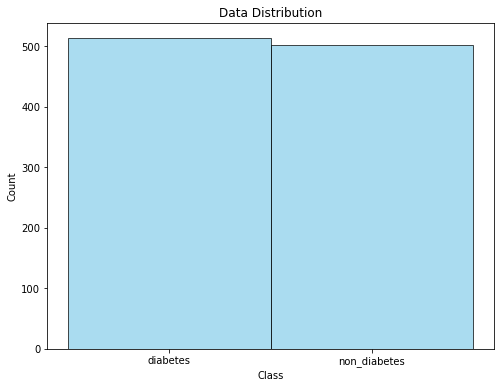

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/lab5/tongue_diabetes_new"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Normal and Tuberculosis)
for class_name in ['diabetes', 'non_diabetes']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Normal, 1 for Tuberculosis) to the labels list
        labels.append(0 if class_name == 'diabetes' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("diabetes:", np.sum(labels == 0), "non_diabetes:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


# Equal amount of data is taken

In [3]:
# Separate data for Normal and Tuberculosis classes
diabetes_images = images[labels == 0][:500]
non_diabetes_images = images[labels == 1][:500]
diabetes_labels = labels[labels == 0][:500]
non_diabetes_labels = labels[labels == 1][:500]

# Concatenate the data back together
balanced_images = np.concatenate([diabetes_images, non_diabetes_images])
balanced_labels = np.concatenate([diabetes_labels, non_diabetes_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

#print the balanced data
print("Balanced Images:",balanced_images.shape)
print("Balanced labels:",balanced_labels.shape)

#print the data seperately of each class
print("diabetes_images:",diabetes_images.shape)
print("non_diabetes_images:",non_diabetes_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1000, 224, 224)
Balanced labels: (1000,)
diabetes_images: (500, 224, 224)
non_diabetes_images: (500, 224, 224)
X_train shape: (800, 224, 224)
X_test shape: (200, 224, 224)
y_train shape: (800,)
y_test shape: (200,)


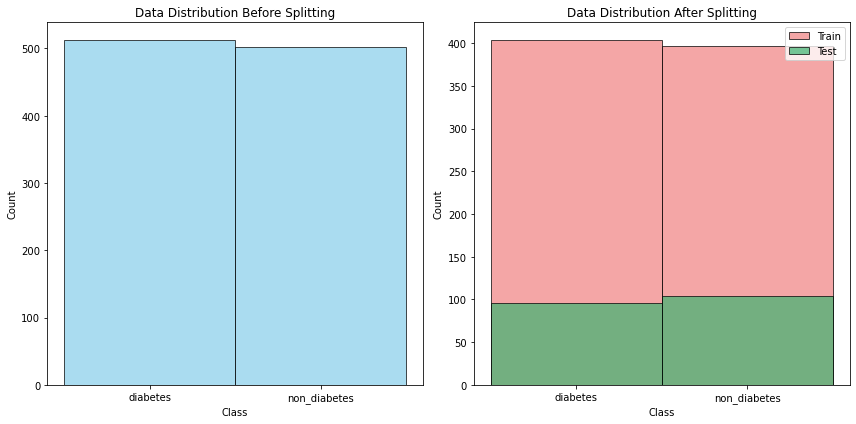

In [4]:
# Plot histogram for class distribution before splitting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution Before Splitting')

# Plot histogram for class distribution after splitting
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, color='lightcoral', edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test, bins=2, color='mediumseagreen', edgecolor='black', alpha=0.7, label='Test')
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution After Splitting')
plt.legend()

plt.tight_layout()
plt.show()


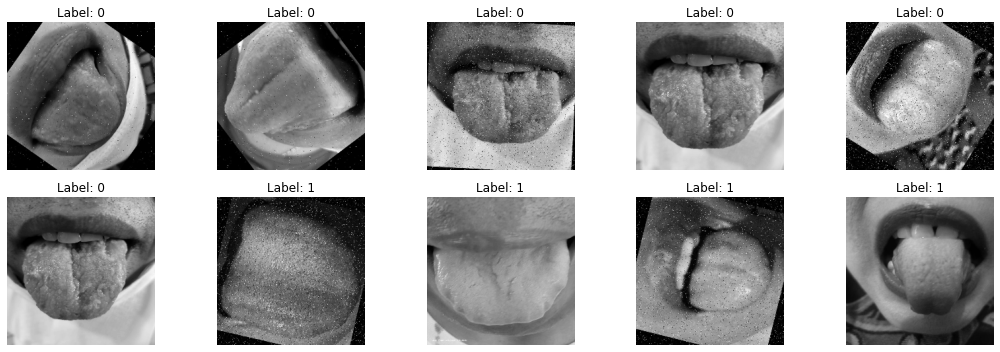

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i % 5 + 1 + (i // 5) * 5)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

In [6]:
images[0]

array([[0.54901963, 0.54901963, 0.54901963, ..., 0.4392157 , 0.43137255,
        0.41568628],
       [0.5647059 , 0.5647059 , 0.5647059 , ..., 0.4392157 , 0.42745098,
        0.41568628],
       [0.56078434, 0.56078434, 0.56078434, ..., 0.4392157 , 0.42745098,
        0.41568628],
       ...,
       [0.99607843, 0.99607843, 0.99607843, ..., 0.01176471, 0.02745098,
        0.02352941],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.01960784, 0.02352941,
        0.02352941],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.03529412, 0.01960784,
        0.02352941]], dtype=float32)

Yes, you can add other layers or modify the architecture of the custom classification head in various ways, depending on the specific requirements of your task. Here are some common modifications:

1. **Dropout Layers**: Adding dropout layers can help prevent overfitting. Dropout layers randomly set a fraction of input units to 0 at each update during training, which helps prevent overfitting.

   Example:
   ```python
   x = Dropout(0.5)(x)  # Add dropout with a dropout rate of 0.5
   ```

2. **Batch Normalization**: Batch normalization normalizes the input layer by adjusting and scaling the activations. It can help with faster convergence and better generalization.

   Example:
   ```python
   x = BatchNormalization()(x)
   ```

3. **Additional Dense Layers**: Adding more dense layers can increase the model's capacity to learn complex patterns in the data. However, adding too many layers can lead to overfitting.

   Example:
   ```python
   x = Dense(256, activation='relu')(x)
   ```

4. **Different Activation Functions**: You can experiment with different activation functions in the dense layers. Common choices include `sigmoid`, `tanh`, and `relu`.

   Example:
   ```python
   x = Dense(512, activation='tanh')(x)
   ```

5. **Regularization**: You can add regularization to the dense layers to prevent overfitting. Common regularization techniques include L1 regularization, L2 regularization, and dropout.

   Example:
   ```python
   from tensorflow.keras import regularizers
   x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
   ```

These modifications can be added to the custom classification head after the `GlobalAveragePooling2D` layer to customize the model according to your needs. The choice of layers and their configurations should be based on the specific requirements of your task and the characteristics of your dataset.

# OverFitting  and UnderFitting Identification


Overfitting occurs when a machine learning model learns the training data too well, to the point that it negatively impacts its performance on unseen data. To identify overfitting, you can use several techniques:

1. **Validation Curve**: Plot the training and validation accuracies or losses against the number of epochs. If the training accuracy keeps increasing while the validation accuracy stagnates or starts decreasing, it indicates overfitting.

2. **Learning Curve**: Plot the training and validation accuracies or losses against the size of the training dataset. If the training and validation curves converge at a low error, the model is underfitting. If they diverge, the model may be overfitting.

3. **Validation Set Performance**: Evaluate the model on a separate validation set during training. If the validation accuracy starts to decrease while the training accuracy keeps increasing, the model is likely overfitting.

4. **Regularization Techniques**: Regularization techniques like L1 and L2 regularization, dropout, and early stopping can help prevent overfitting. If you observe a significant improvement in performance with these techniques, it indicates that overfitting was present.

5. **Cross-Validation**: Use k-fold cross-validation to assess the model's performance on different subsets of the data. If the model performs significantly better on the training data compared to the validation data, it suggests overfitting.

6. **Model Complexity**: If you have control over the model architecture, reducing the complexity (e.g., number of layers, number of units per layer) can help prevent overfitting.

7. **Data Augmentation**: If applicable, augmenting the training data can help improve the model's generalization performance by exposing it to more variations in the data.

By monitoring these indicators, you can identify and mitigate overfitting in your machine learning models.

# CNN (A) + Dense Layers (B):

Base Model (A):CNN pre-trained on ImageNet.

Main Model (B): Additional dense layers for classification.

Explanation: Use CNN as the feature extractor and add dense layers on top to classify images based on the features extracted by CNN.

2024-03-21 13:49:15.693776: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-21 13:49:15.710932: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 13:49:15.710961: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 13:49:15.710974: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 13:49:15.714442: I tensorflow/core/platform/cpu_feature_g

Epoch 1/20
25/25 [==============================] - 13s 485ms/step - loss: 1.2332 - accuracy: 0.5225 - precision: 0.5229 - recall: 0.4040 - auc: 0.5348 - auc_1: 0.5018 - true_negatives: 258.0000 - false_positives: 146.0000 - false_negatives: 236.0000 - true_positives: 160.0000 - val_loss: 0.6908 - val_accuracy: 0.4800 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7750 - val_auc_1: 0.7739 - val_true_negatives: 96.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 104.0000 - val_true_positives: 0.0000e+00
Epoch 2/20
25/25 [==============================] - 12s 475ms/step - loss: 0.6660 - accuracy: 0.6125 - precision: 0.6593 - recall: 0.4495 - auc: 0.6456 - auc_1: 0.6226 - true_negatives: 312.0000 - false_positives: 92.0000 - false_negatives: 218.0000 - true_positives: 178.0000 - val_loss: 0.6360 - val_accuracy: 0.6200 - val_precision: 0.8684 - val_recall: 0.3173 - val_auc: 0.8192 - val_auc_1: 0.8079 - val_true_negatives: 91.0000 - val_false_positives: 5.000

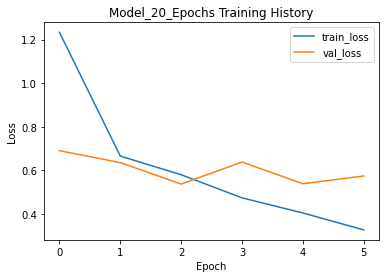

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Load your dataset or use existing data
# Assume X_train, X_test, y_train, y_test are already loaded

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'CNN+DENSE20',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("CNN+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model_20_Epochs Training History")
plt.show()


Epoch 1/40
25/25 [==============================] - 13s 480ms/step - loss: 1.2052 - accuracy: 0.5350 - precision_1: 0.5286 - recall_1: 0.5606 - auc_2: 0.5215 - auc_3: 0.4893 - true_negatives_1: 206.0000 - false_positives_1: 198.0000 - false_negatives_1: 174.0000 - true_positives_1: 222.0000 - val_loss: 0.7181 - val_accuracy: 0.4800 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.6128 - val_auc_3: 0.6505 - val_true_negatives_1: 96.0000 - val_false_positives_1: 0.0000e+00 - val_false_negatives_1: 104.0000 - val_true_positives_1: 0.0000e+00
Epoch 2/40
25/25 [==============================] - 12s 467ms/step - loss: 0.6900 - accuracy: 0.5575 - precision_1: 0.5750 - recall_1: 0.4066 - auc_2: 0.5651 - auc_3: 0.5395 - true_negatives_1: 285.0000 - false_positives_1: 119.0000 - false_negatives_1: 235.0000 - true_positives_1: 161.0000 - val_loss: 0.7190 - val_accuracy: 0.4800 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.7276 - val_auc_3: 0.7404 -

Epoch 15: early stopping
7/7 [==============================] - 1s 68ms/step
Model Details:
Model: CNN+DENSE40
Epochs: 40
Test Accuracy: 0.8600000143051147
Test Loss: 0.3675590753555298
Validation Accuracy: 0.8600000143051147
Validation Loss: 0.4052698612213135
Precision: 0.8220338983050848
Recall: 0.9326923076923077
AUC-ROC: 0.8569711538461539
AUC-PR: 0.8948631029986963
True Negatives: 75.0
False Positives: 21.0
False Negatives: 7.0
True Positives: 97.0
Error Rate: 0.4964
F1 Score: 0.8738738738738739
Cohen's Kappa: 0.717969379532635
Matthews Correlation Coefficient: 0.7252161634975717
Balanced Accuracy: 0.8569711538461539
Time Taken (seconds): 178.49871850013733


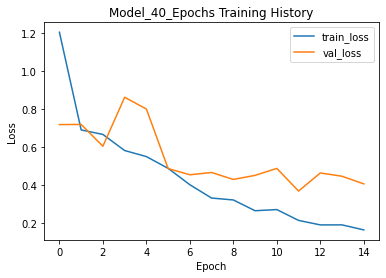

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Load your dataset or use existing data
# Assume X_train, X_test, y_train, y_test are already loaded

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'CNN+DENSE40',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("CNN+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model_40_Epochs Training History")
plt.show()


Epoch 1/60
25/25 [==============================] - 13s 482ms/step - loss: 1.2643 - accuracy: 0.4850 - precision_2: 0.4688 - recall_2: 0.3030 - auc_4: 0.5159 - auc_5: 0.4807 - true_negatives_2: 268.0000 - false_positives_2: 136.0000 - false_negatives_2: 276.0000 - true_positives_2: 120.0000 - val_loss: 0.6925 - val_accuracy: 0.5700 - val_precision_2: 0.8462 - val_recall_2: 0.2115 - val_auc_4: 0.5501 - val_auc_5: 0.5474 - val_true_negatives_2: 92.0000 - val_false_positives_2: 4.0000 - val_false_negatives_2: 82.0000 - val_true_positives_2: 22.0000
Epoch 2/60
25/25 [==============================] - 12s 465ms/step - loss: 0.6894 - accuracy: 0.5650 - precision_2: 0.5876 - recall_2: 0.4066 - auc_4: 0.5609 - auc_5: 0.5388 - true_negatives_2: 291.0000 - false_positives_2: 113.0000 - false_negatives_2: 235.0000 - true_positives_2: 161.0000 - val_loss: 0.6947 - val_accuracy: 0.4800 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_auc_4: 0.7083 - val_auc_5: 0.7393 - val_true_negati

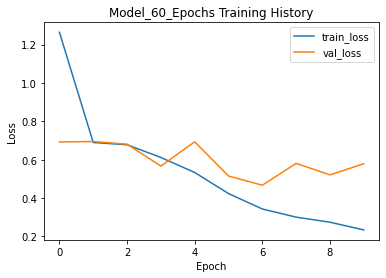

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Load your dataset or use existing data
# Assume X_train, X_test, y_train, y_test are already loaded

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'CNN+DENSE60',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("CNN+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model_60_Epochs Training History")
plt.show()


Epoch 1/80
25/25 [==============================] - 12s 475ms/step - loss: 1.2556 - accuracy: 0.5425 - precision_3: 0.5306 - recall_3: 0.6566 - auc_6: 0.5456 - auc_7: 0.5107 - true_negatives_3: 174.0000 - false_positives_3: 230.0000 - false_negatives_3: 136.0000 - true_positives_3: 260.0000 - val_loss: 0.6903 - val_accuracy: 0.4800 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_auc_6: 0.8034 - val_auc_7: 0.7995 - val_true_negatives_3: 96.0000 - val_false_positives_3: 0.0000e+00 - val_false_negatives_3: 104.0000 - val_true_positives_3: 0.0000e+00
Epoch 2/80
25/25 [==============================] - 12s 462ms/step - loss: 0.6822 - accuracy: 0.5663 - precision_3: 0.5814 - recall_3: 0.4419 - auc_6: 0.5811 - auc_7: 0.5680 - true_negatives_3: 278.0000 - false_positives_3: 126.0000 - false_negatives_3: 221.0000 - true_positives_3: 175.0000 - val_loss: 0.7123 - val_accuracy: 0.4800 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_auc_6: 0.8113 - val_auc_7: 0.7841 -

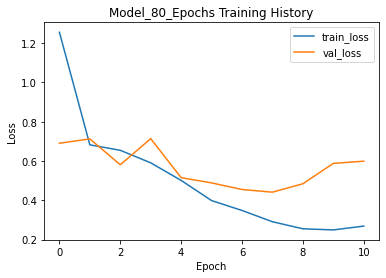

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Load your dataset or use existing data
# Assume X_train, X_test, y_train, y_test are already loaded

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'CNN+DENSE80',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("CNN+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model_80_Epochs Training History")
plt.show()


Epoch 1/100
25/25 [==============================] - 12s 473ms/step - loss: 1.1802 - accuracy: 0.5450 - precision_4: 0.5678 - recall_4: 0.3384 - auc_8: 0.5306 - auc_9: 0.5058 - true_negatives_4: 302.0000 - false_positives_4: 102.0000 - false_negatives_4: 262.0000 - true_positives_4: 134.0000 - val_loss: 0.6933 - val_accuracy: 0.4800 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_auc_8: 0.6486 - val_auc_9: 0.6654 - val_true_negatives_4: 96.0000 - val_false_positives_4: 0.0000e+00 - val_false_negatives_4: 104.0000 - val_true_positives_4: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 12s 465ms/step - loss: 0.6934 - accuracy: 0.5550 - precision_4: 0.5645 - recall_4: 0.4419 - auc_8: 0.5585 - auc_9: 0.5252 - true_negatives_4: 269.0000 - false_positives_4: 135.0000 - false_negatives_4: 221.0000 - true_positives_4: 175.0000 - val_loss: 0.6836 - val_accuracy: 0.5500 - val_precision_4: 0.7059 - val_recall_4: 0.2308 - val_auc_8: 0.7421 - val_auc_9: 0.6981 - val_t

7/7 [==============================] - 1s 67ms/step
Model Details:
Model: CNN+DENSE100
Epochs: 100
Test Accuracy: 0.8500000238418579
Test Loss: 0.4318458139896393
Validation Accuracy: 0.8050000071525574
Validation Loss: 0.5300571322441101
Precision: 0.8775510204081632
Recall: 0.8269230769230769
AUC-ROC: 0.8509615384615384
AUC-PR: 0.89723704866562
True Negatives: 84.0
False Positives: 12.0
False Negatives: 18.0
True Positives: 86.0
Error Rate: 0.5004
F1 Score: 0.8514851485148514
Cohen's Kappa: 0.7002398081534772
Matthews Correlation Coefficient: 0.7015016280247258
Balanced Accuracy: 0.8509615384615384
Time Taken (seconds): 164.42755436897278


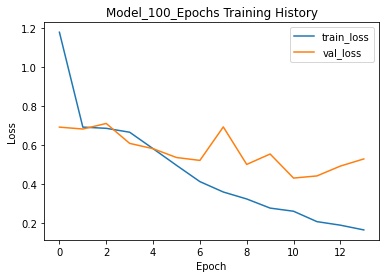

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Load your dataset or use existing data
# Assume X_train, X_test, y_train, y_test are already loaded

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'CNN+DENSE100',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("CNN+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model_100_Epochs Training History")
plt.show()


In [14]:
import pandas as pd
from IPython.display import display

# Load metrics from CSV files for each epoch
metrics_20_epochs = pd.read_csv("CNN+DENSE20_Metrics.csv")
metrics_40_epochs = pd.read_csv("CNN+DENSE40_Metrics.csv")
metrics_60_epochs = pd.read_csv("CNN+DENSE60_Metrics.csv")
metrics_80_epochs = pd.read_csv("CNN+DENSE80_Metrics.csv")
metrics_100_epochs = pd.read_csv("CNN+DENSE100_Metrics.csv")

# Concatenate all metrics into a single DataFrame
all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# Save combined metrics to a single CSV file
all_metrics_file = "model1(CNN)_metrics_combined.csv"
all_metrics.to_csv(all_metrics_file, index=False)



In [15]:
num_training_records = X_train_resized.shape[0]
print("Number of training records:", num_training_records)


Number of training records: 800


# CNN (A) + Dropout + Dense Layers (B):

Base Model (A): CNN  pre-trained on ImageNet.
Main Model (B): Dropout layer followed by dense layers for classification.
Explanation: CNN  extracts features from images, dropout helps prevent overfitting, and dense layers classify images based on the extracted features.

# Dropout

Dropout is a regularization technique used to prevent overfitting in neural networks. It works by randomly setting a fraction of input units to zero during each training iteration, which helps to reduce the network's reliance on specific units and encourages the network to learn more robust features.

The main purpose of dropout is to improve the generalization of the model by preventing it from memorizing the training data and instead encouraging it to learn more generalizable features. This can lead to better performance on unseen data and reduce the risk of overfitting, especially in deep neural networks with many parameters.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 26, 26, 128)      

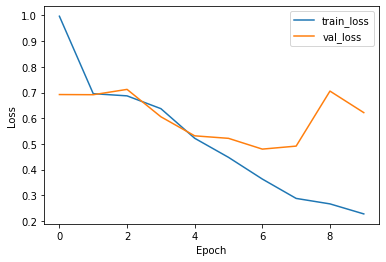

7/7 [==============================] - 1s 70ms/step - loss: 0.4797 - accuracy: 0.8150 - precision_5: 0.8252 - recall_5: 0.8173 - auc_10: 0.8660 - auc_11: 0.8383 - true_negatives_5: 78.0000 - false_positives_5: 18.0000 - false_negatives_5: 19.0000 - true_positives_5: 85.0000
Test Accuracy: 81.50%
Test Loss: 0.48
Precision: 0.83
Recall: 0.82
AUC-ROC: 0.87
AUC-PR: 0.84
TN: 78.0, FP: 18.0, FN: 19.0, TP: 85.0
7/7 [==============================] - 1s 67ms/step
Confusion Matrix:
[[78 18]
 [19 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        96
           1       0.83      0.82      0.82       104

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.82       200

AUC Score: 0.81
Precision: 0.83
Recall: 0.82
F1 Score: 0.82
PR AUC: 0.87
Cohen's Kappa Coefficient: 0.63
Matthews Correlation Coefficient (MCC): 0.63
Bal

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

metrics = {
    'Model': 'Model2_20_Epochs',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}


df = pd.DataFrame(metrics, index=[0])
df.to_csv("model2_20_epochs_metrics.csv", index=False)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 26, 26, 128)      

25/25 [==============================] - 11s 459ms/step - loss: 0.2326 - accuracy: 0.9075 - precision_6: 0.9005 - recall_6: 0.9141 - auc_12: 0.9670 - auc_13: 0.9605 - true_negatives_6: 364.0000 - false_positives_6: 40.0000 - false_negatives_6: 34.0000 - true_positives_6: 362.0000 - val_loss: 0.4820 - val_accuracy: 0.8400 - val_precision_6: 0.8913 - val_recall_6: 0.7885 - val_auc_12: 0.9030 - val_auc_13: 0.9011 - val_true_negatives_6: 86.0000 - val_false_positives_6: 10.0000 - val_false_negatives_6: 22.0000 - val_true_positives_6: 82.0000
Epoch 13/40
25/25 [==============================] - 12s 461ms/step - loss: 0.1919 - accuracy: 0.9287 - precision_6: 0.9144 - recall_6: 0.9444 - auc_12: 0.9760 - auc_13: 0.9715 - true_negatives_6: 369.0000 - false_positives_6: 35.0000 - false_negatives_6: 22.0000 - true_positives_6: 374.0000 - val_loss: 0.5165 - val_accuracy: 0.8350 - val_precision_6: 0.9080 - val_recall_6: 0.7596 - val_auc_12: 0.9103 - val_auc_13: 0.9069 - val_true_negatives_6: 88.000

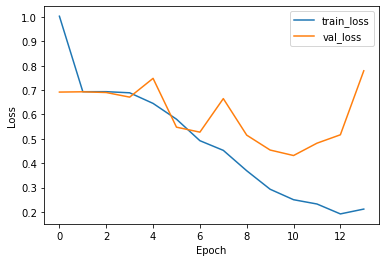

7/7 [==============================] - 0s 67ms/step - loss: 0.4314 - accuracy: 0.8450 - precision_6: 0.8763 - recall_6: 0.8173 - auc_12: 0.8987 - auc_13: 0.8763 - true_negatives_6: 84.0000 - false_positives_6: 12.0000 - false_negatives_6: 19.0000 - true_positives_6: 85.0000
Test Accuracy: 84.50%
Test Loss: 0.43
Precision: 0.88
Recall: 0.82
AUC-ROC: 0.90
AUC-PR: 0.88
TN: 84.0, FP: 12.0, FN: 19.0, TP: 85.0
7/7 [==============================] - 1s 66ms/step
Confusion Matrix:
[[84 12]
 [19 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.84        96
           1       0.88      0.82      0.85       104

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200

AUC Score: 0.85
Precision: 0.88
Recall: 0.82
F1 Score: 0.85
PR AUC: 0.89
Cohen's Kappa Coefficient: 0.69
Matthews Correlation Coefficient (MCC): 0.69
Bal

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


metrics = {
    'Model': 'Model2_40_Epochs',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}
df = pd.DataFrame(metrics, index=[0])
df.to_csv("model2_40_epochs_metrics.csv", index=False)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 26, 26, 128)      

25/25 [==============================] - 12s 464ms/step - loss: 0.1306 - accuracy: 0.9575 - precision_7: 0.9548 - recall_7: 0.9596 - auc_14: 0.9890 - auc_15: 0.9868 - true_negatives_7: 386.0000 - false_positives_7: 18.0000 - false_negatives_7: 16.0000 - true_positives_7: 380.0000 - val_loss: 0.4698 - val_accuracy: 0.8300 - val_precision_7: 0.8804 - val_recall_7: 0.7788 - val_auc_14: 0.9195 - val_auc_15: 0.9271 - val_true_negatives_7: 85.0000 - val_false_positives_7: 11.0000 - val_false_negatives_7: 23.0000 - val_true_positives_7: 81.0000
Epoch 12: early stopping


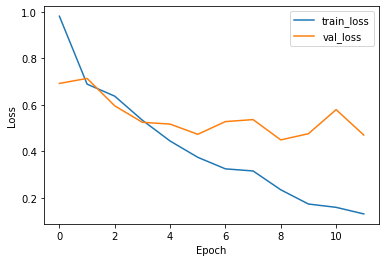

7/7 [==============================] - 0s 68ms/step - loss: 0.4489 - accuracy: 0.8250 - precision_7: 0.8710 - recall_7: 0.7788 - auc_14: 0.9010 - auc_15: 0.8951 - true_negatives_7: 84.0000 - false_positives_7: 12.0000 - false_negatives_7: 23.0000 - true_positives_7: 81.0000
Test Accuracy: 82.50%
Test Loss: 0.45
Precision: 0.87
Recall: 0.78
AUC-ROC: 0.90
AUC-PR: 0.90
TN: 84.0, FP: 12.0, FN: 23.0, TP: 81.0
7/7 [==============================] - 1s 66ms/step
Confusion Matrix:
[[84 12]
 [23 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        96
           1       0.87      0.78      0.82       104

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200

AUC Score: 0.83
Precision: 0.87
Recall: 0.78
F1 Score: 0.82
PR AUC: 0.88
Cohen's Kappa Coefficient: 0.65
Matthews Correlation Coefficient (MCC): 0.65
Bal

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

metrics = {
    'Model': 'Model2_60_Epochs',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

df = pd.DataFrame(metrics, index=[0])
df.to_csv("model2_60_epochs_metrics.csv", index=False)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 26, 26, 128)      

25/25 [==============================] - 12s 461ms/step - loss: 0.2483 - accuracy: 0.9025 - precision_8: 0.8878 - recall_8: 0.9192 - auc_16: 0.9568 - auc_17: 0.9385 - true_negatives_8: 358.0000 - false_positives_8: 46.0000 - false_negatives_8: 32.0000 - true_positives_8: 364.0000 - val_loss: 0.6697 - val_accuracy: 0.7650 - val_precision_8: 0.8904 - val_recall_8: 0.6250 - val_auc_16: 0.8796 - val_auc_17: 0.8393 - val_true_negatives_8: 88.0000 - val_false_positives_8: 8.0000 - val_false_negatives_8: 39.0000 - val_true_positives_8: 65.0000
Epoch 13/80
25/25 [==============================] - 12s 467ms/step - loss: 0.2140 - accuracy: 0.9300 - precision_8: 0.9167 - recall_8: 0.9444 - auc_16: 0.9675 - auc_17: 0.9549 - true_negatives_8: 370.0000 - false_positives_8: 34.0000 - false_negatives_8: 22.0000 - true_positives_8: 374.0000 - val_loss: 0.4754 - val_accuracy: 0.8350 - val_precision_8: 0.9383 - val_recall_8: 0.7308 - val_auc_16: 0.9292 - val_auc_17: 0.9271 - val_true_negatives_8: 91.0000

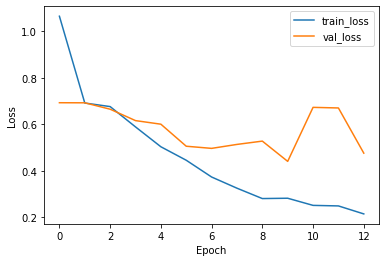

7/7 [==============================] - 0s 68ms/step - loss: 0.4400 - accuracy: 0.8050 - precision_8: 0.7731 - recall_8: 0.8846 - auc_16: 0.8856 - auc_17: 0.8709 - true_negatives_8: 69.0000 - false_positives_8: 27.0000 - false_negatives_8: 12.0000 - true_positives_8: 92.0000
Test Accuracy: 80.50%
Test Loss: 0.44
Precision: 0.77
Recall: 0.88
AUC-ROC: 0.89
AUC-PR: 0.87
TN: 69.0, FP: 27.0, FN: 12.0, TP: 92.0
7/7 [==============================] - 1s 67ms/step
Confusion Matrix:
[[69 27]
 [12 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        96
           1       0.77      0.88      0.83       104

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

AUC Score: 0.80
Precision: 0.77
Recall: 0.88
F1 Score: 0.83
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.61
Matthews Correlation Coefficient (MCC): 0.61
Bal

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV file
metrics = {
    'Model': 'Model2_80_Epochs',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

df = pd.DataFrame(metrics, index=[0])
df.to_csv("model2_80_epochs_metrics.csv", index=False)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 26, 26, 128)      

25/25 [==============================] - 12s 461ms/step - loss: 0.3160 - accuracy: 0.8662 - precision_9: 0.8658 - recall_9: 0.8636 - auc_18: 0.9389 - auc_19: 0.9302 - true_negatives_9: 351.0000 - false_positives_9: 53.0000 - false_negatives_9: 54.0000 - true_positives_9: 342.0000 - val_loss: 0.4284 - val_accuracy: 0.7950 - val_precision_9: 0.8316 - val_recall_9: 0.7596 - val_auc_18: 0.8920 - val_auc_19: 0.8829 - val_true_negatives_9: 80.0000 - val_false_positives_9: 16.0000 - val_false_negatives_9: 25.0000 - val_true_positives_9: 79.0000
Epoch 13/100
25/25 [==============================] - 11s 460ms/step - loss: 0.3260 - accuracy: 0.8775 - precision_9: 0.8725 - recall_9: 0.8813 - auc_18: 0.9386 - auc_19: 0.9368 - true_negatives_9: 353.0000 - false_positives_9: 51.0000 - false_negatives_9: 47.0000 - true_positives_9: 349.0000 - val_loss: 0.4950 - val_accuracy: 0.7800 - val_precision_9: 0.8125 - val_recall_9: 0.7500 - val_auc_18: 0.8684 - val_auc_19: 0.8436 - val_true_negatives_9: 78.00

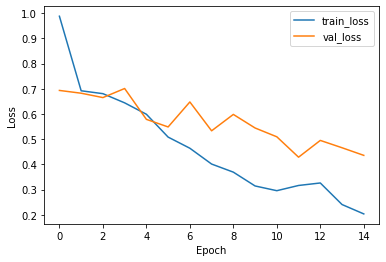

7/7 [==============================] - 0s 68ms/step - loss: 0.4284 - accuracy: 0.7950 - precision_9: 0.8316 - recall_9: 0.7596 - auc_18: 0.8920 - auc_19: 0.8829 - true_negatives_9: 80.0000 - false_positives_9: 16.0000 - false_negatives_9: 25.0000 - true_positives_9: 79.0000
Test Accuracy: 79.50%
Test Loss: 0.43
Precision: 0.83
Recall: 0.76
AUC-ROC: 0.89
AUC-PR: 0.88
TN: 80.0, FP: 16.0, FN: 25.0, TP: 79.0
7/7 [==============================] - 1s 67ms/step
Confusion Matrix:
[[80 16]
 [25 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80        96
           1       0.83      0.76      0.79       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200

AUC Score: 0.80
Precision: 0.83
Recall: 0.76
F1 Score: 0.79
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.59
Matthews Correlation Coefficient (MCC): 0.59
Bal

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

metrics = {
    'Model': 'Model2_100_Epochs',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

df = pd.DataFrame(metrics, index=[0])
df.to_csv("model2_100_epochs_metrics.csv", index=False)


In [22]:
import pandas as pd
from IPython.display import display

# Load metrics from CSV files for each epoch
metrics_20_epochs = pd.read_csv("model2_20_epochs_metrics.csv")
metrics_40_epochs = pd.read_csv("model2_40_epochs_metrics.csv")
metrics_60_epochs = pd.read_csv("model2_60_epochs_metrics.csv")
metrics_80_epochs = pd.read_csv("model2_80_epochs_metrics.csv")
metrics_100_epochs = pd.read_csv("model2_100_epochs_metrics.csv")

# Concatenate all metrics into a single DataFrame
all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# Save combined metrics to a single CSV file
all_metrics_file = "model2(CNN)_metrics_combined.csv"
all_metrics.to_csv(all_metrics_file, index=False)


# CNN (A) + GlobalAveragePooling2D + Dense Layers (B):

Base Model (A): CNN pre-trained on ImageNet.
Main Model (B): GlobalAveragePooling2D layer followed by dense layers for classification.
Explanation: CNN extracts features, GlobalAveragePooling2D reduces spatial dimensions, and dense layers classify images.

Removing the dropout layer and adjusting the dense layer accordingly can be beneficial in certain cases. Dropout is a regularization technique used to prevent overfitting by randomly setting a fraction of input units to zero during training, which helps to reduce the model's reliance on specific weights and improves generalization.

However, in some cases, using dropout may not be necessary or may not provide significant benefits. If the model is not overfitting or if there are other regularization techniques in place, such as early stopping or weight decay, the dropout layer may not be needed.

Adjusting the dense layer accordingly means that you may need to modify the number of units or other parameters in the dense layer to compensate for the removal of the dropout layer. This adjustment ensures that the model still has enough capacity to learn from the data and make accurate predictions.

In summary, removing the dropout layer and adjusting the dense layer can be useful when dropout is not providing significant benefits or when the model is not overfitting. It allows for a simpler model architecture without sacrificing performance.

# GlobalAveragePooling2D

GlobalAveragePooling2D is used to reduce the spatial dimensions (height and width) of a 3D tensor and convert it into a 2D tensor by taking the average of all values in each channel.

In the context of convolutional neural networks (CNNs) for image classification, GlobalAveragePooling2D is often used as an alternative to Flatten followed by Dense layers. It helps in reducing the number of parameters in the model and controlling overfitting. Here's why it's commonly used:

1. **Reduction in Parameters**: GlobalAveragePooling2D reduces the spatial dimensions of the input, which in turn reduces the number of parameters in the model. This can help prevent overfitting, especially in models with a large number of parameters.

2. **Translation Invariance**: By taking the average of all values in each channel, GlobalAveragePooling2D makes the model more robust to translations in the input image. This means that the model can still recognize objects in an image even if they are in slightly different positions.

3. **Spatial Hierarchy**: GlobalAveragePooling2D captures the spatial hierarchy of features in an image. Features at higher spatial resolutions (closer to the input) represent more detailed information, while features at lower resolutions represent more abstract information. By taking the average, GlobalAveragePooling2D retains this hierarchy.

4. **Computationally Efficient**: Compared to Flatten followed by Dense layers, GlobalAveragePooling2D is computationally more efficient. It reduces the computational load of the model, making it faster to train and evaluate.

Overall, GlobalAveragePooling2D is a simple yet effective way to reduce the spatial dimensions of an input tensor in a CNN, leading to a more efficient and potentially more effective model.

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define CNN architecture
model_20_epochs = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model_20_epochs.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                                tf.keras.metrics.Precision(),
                                                                                tf.keras.metrics.Recall(),
                                                                                tf.keras.metrics.AUC(),
                                                                                tf.keras.metrics.AUC(curve='PR'),
                                                                                tf.keras.metrics.TrueNegatives(),
                                                                                tf.keras.metrics.FalsePositives(),
                                                                                tf.keras.metrics.FalseNegatives(),
                                                                                tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model_20_epochs.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])
 #Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV file
metrics = {
    'Model': 'Model2_20_Epochs',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics to DataFrame
metrics_df_20_epochs = pd.DataFrame(metrics_20_epochs, index=[0])

# Save metrics to CSV file
metrics_df_20_epochs.to_csv('model3_metrics_20_epochs.csv', index=False)


Epoch 1/20
25/25 [==============================] - 12s 468ms/step - loss: 0.9679 - accuracy: 0.5038 - precision_10: 0.4981 - recall_10: 0.3283 - auc_20: 0.5195 - auc_21: 0.4862 - true_negatives_10: 273.0000 - false_positives_10: 131.0000 - false_negatives_10: 266.0000 - true_positives_10: 130.0000 - val_loss: 0.6929 - val_accuracy: 0.5200 - val_precision_10: 0.5200 - val_recall_10: 1.0000 - val_auc_20: 0.5240 - val_auc_21: 0.5757 - val_true_negatives_10: 0.0000e+00 - val_false_positives_10: 96.0000 - val_false_negatives_10: 0.0000e+00 - val_true_positives_10: 104.0000
Epoch 2/20
25/25 [==============================] - 11s 458ms/step - loss: 0.6949 - accuracy: 0.4963 - precision_10: 0.4889 - recall_10: 0.3889 - auc_20: 0.4942 - auc_21: 0.4903 - true_negatives_10: 243.0000 - false_positives_10: 161.0000 - false_negatives_10: 242.0000 - true_positives_10: 154.0000 - val_loss: 0.6930 - val_accuracy: 0.5200 - val_precision_10: 0.5200 - val_recall_10: 1.0000 - val_auc_20: 0.5000 - val_auc_

25/25 [==============================] - 11s 458ms/step - loss: 0.1250 - accuracy: 0.9525 - precision_10: 0.9387 - recall_10: 0.9672 - auc_20: 0.9895 - auc_21: 0.9879 - true_negatives_10: 379.0000 - false_positives_10: 25.0000 - false_negatives_10: 13.0000 - true_positives_10: 383.0000 - val_loss: 0.4502 - val_accuracy: 0.8550 - val_precision_10: 0.8151 - val_recall_10: 0.9327 - val_auc_20: 0.9072 - val_auc_21: 0.9067 - val_true_negatives_10: 74.0000 - val_false_positives_10: 22.0000 - val_false_negatives_10: 7.0000 - val_true_positives_10: 97.0000
Epoch 16/20
25/25 [==============================] - 12s 462ms/step - loss: 0.1877 - accuracy: 0.9275 - precision_10: 0.9225 - recall_10: 0.9318 - auc_20: 0.9765 - auc_21: 0.9686 - true_negatives_10: 373.0000 - false_positives_10: 31.0000 - false_negatives_10: 27.0000 - true_positives_10: 369.0000 - val_loss: 0.3909 - val_accuracy: 0.8300 - val_precision_10: 0.7917 - val_recall_10: 0.9135 - val_auc_20: 0.9109 - val_auc_21: 0.8992 - val_true_

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define CNN architecture
model_40_epochs = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model_40_epochs.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                                tf.keras.metrics.Precision(),
                                                                                tf.keras.metrics.Recall(),
                                                                                tf.keras.metrics.AUC(),
                                                                                tf.keras.metrics.AUC(curve='PR'),
                                                                                tf.keras.metrics.TrueNegatives(),
                                                                                tf.keras.metrics.FalsePositives(),
                                                                                tf.keras.metrics.FalseNegatives(),
                                                                                tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model_40_epochs.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])
 #Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Save metrics to CSV file
metrics = {
    'Model': 'Model2_40_Epochs',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics to DataFrame
metrics_df_40_epochs = pd.DataFrame(metrics_40_epochs, index=[0])

# Save metrics to CSV file
metrics_df_40_epochs.to_csv('model3_metrics_40_epochs.csv', index=False)


Epoch 1/40
25/25 [==============================] - 12s 472ms/step - loss: 1.0479 - accuracy: 0.5350 - precision_11: 0.5441 - recall_11: 0.3737 - auc_22: 0.5557 - auc_23: 0.5177 - true_negatives_11: 280.0000 - false_positives_11: 124.0000 - false_negatives_11: 248.0000 - true_positives_11: 148.0000 - val_loss: 0.7255 - val_accuracy: 0.4800 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - val_auc_22: 0.6965 - val_auc_23: 0.7106 - val_true_negatives_11: 96.0000 - val_false_positives_11: 0.0000e+00 - val_false_negatives_11: 104.0000 - val_true_positives_11: 0.0000e+00
Epoch 2/40
25/25 [==============================] - 12s 461ms/step - loss: 0.6836 - accuracy: 0.5612 - precision_11: 0.6027 - recall_11: 0.3333 - auc_22: 0.5991 - auc_23: 0.5715 - true_negatives_11: 317.0000 - false_positives_11: 87.0000 - false_negatives_11: 264.0000 - true_positives_11: 132.0000 - val_loss: 0.7121 - val_accuracy: 0.4800 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - val_auc_22: 0.

25/25 [==============================] - 12s 461ms/step - loss: 0.1378 - accuracy: 0.9488 - precision_11: 0.9426 - recall_11: 0.9545 - auc_22: 0.9871 - auc_23: 0.9850 - true_negatives_11: 381.0000 - false_positives_11: 23.0000 - false_negatives_11: 18.0000 - true_positives_11: 378.0000 - val_loss: 0.3777 - val_accuracy: 0.8700 - val_precision_11: 0.8750 - val_recall_11: 0.8750 - val_auc_22: 0.9286 - val_auc_23: 0.9326 - val_true_negatives_11: 83.0000 - val_false_positives_11: 13.0000 - val_false_negatives_11: 13.0000 - val_true_positives_11: 91.0000
Epoch 15: early stopping
7/7 [==============================] - 1s 68ms/step - loss: 0.4284 - accuracy: 0.7950 - precision_9: 0.8316 - recall_9: 0.7596 - auc_18: 0.8920 - auc_19: 0.8829 - true_negatives_9: 80.0000 - false_positives_9: 16.0000 - false_negatives_9: 25.0000 - true_positives_9: 79.0000
Test Accuracy: 79.50%
Test Loss: 0.43
Precision: 0.83
Recall: 0.76
AUC-ROC: 0.89
AUC-PR: 0.88
TN: 80.0, FP: 16.0, FN: 25.0, TP: 79.0
7/7 [======

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define CNN architecture
model_60_epochs = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model_60_epochs.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                                tf.keras.metrics.Precision(),
                                                                                tf.keras.metrics.Recall(),
                                                                                tf.keras.metrics.AUC(),
                                                                                tf.keras.metrics.AUC(curve='PR'),
                                                                                tf.keras.metrics.TrueNegatives(),
                                                                                tf.keras.metrics.FalsePositives(),
                                                                                tf.keras.metrics.FalseNegatives(),
                                                                                tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model_60_epochs.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])
 #Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Save metrics to CSV file
metrics = {
    'Model': 'Model2_60_Epochs',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics to DataFrame
metrics_df_60_epochs = pd.DataFrame(metrics_60_epochs, index=[0])

# Save metrics to CSV file
metrics_df_60_epochs.to_csv('model3_metrics_60_epochs.csv', index=False)


Epoch 1/60
25/25 [==============================] - 12s 470ms/step - loss: 1.2371 - accuracy: 0.5450 - precision_12: 0.6026 - recall_12: 0.2374 - auc_24: 0.5347 - auc_25: 0.5032 - true_negatives_12: 342.0000 - false_positives_12: 62.0000 - false_negatives_12: 302.0000 - true_positives_12: 94.0000 - val_loss: 0.6921 - val_accuracy: 0.4800 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - val_auc_24: 0.6642 - val_auc_25: 0.6914 - val_true_negatives_12: 96.0000 - val_false_positives_12: 0.0000e+00 - val_false_negatives_12: 104.0000 - val_true_positives_12: 0.0000e+00
Epoch 2/60
25/25 [==============================] - 11s 457ms/step - loss: 0.6929 - accuracy: 0.5700 - precision_12: 0.6057 - recall_12: 0.3763 - auc_24: 0.5718 - auc_25: 0.5498 - true_negatives_12: 307.0000 - false_positives_12: 97.0000 - false_negatives_12: 247.0000 - true_positives_12: 149.0000 - val_loss: 0.6927 - val_accuracy: 0.4800 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - val_auc_24: 0.68

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define CNN architecture
model_80_epochs = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model_80_epochs.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                                tf.keras.metrics.Precision(),
                                                                                tf.keras.metrics.Recall(),
                                                                                tf.keras.metrics.AUC(),
                                                                                tf.keras.metrics.AUC(curve='PR'),
                                                                                tf.keras.metrics.TrueNegatives(),
                                                                                tf.keras.metrics.FalsePositives(),
                                                                                tf.keras.metrics.FalseNegatives(),
                                                                                tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model_80_epochs.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])
 #Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Save metrics to CSV file
metrics = {
    'Model': 'Model2_80_Epochs',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics to DataFrame
metrics_df_80_epochs = pd.DataFrame(metrics_80_epochs, index=[0])

# Save metrics to CSV file
metrics_df_80_epochs.to_csv('model3_metrics_80_epochs.csv', index=False)


Epoch 1/80
25/25 [==============================] - 12s 474ms/step - loss: 0.8197 - accuracy: 0.5188 - precision_13: 0.5268 - recall_13: 0.2727 - auc_26: 0.5343 - auc_27: 0.5011 - true_negatives_13: 307.0000 - false_positives_13: 97.0000 - false_negatives_13: 288.0000 - true_positives_13: 108.0000 - val_loss: 0.6930 - val_accuracy: 0.4800 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00 - val_auc_26: 0.7064 - val_auc_27: 0.7100 - val_true_negatives_13: 96.0000 - val_false_positives_13: 0.0000e+00 - val_false_negatives_13: 104.0000 - val_true_positives_13: 0.0000e+00
Epoch 2/80
25/25 [==============================] - 12s 461ms/step - loss: 0.6756 - accuracy: 0.5863 - precision_13: 0.6117 - recall_13: 0.4495 - auc_26: 0.6183 - auc_27: 0.5845 - true_negatives_13: 291.0000 - false_positives_13: 113.0000 - false_negatives_13: 218.0000 - true_positives_13: 178.0000 - val_loss: 0.6689 - val_accuracy: 0.5250 - val_precision_13: 0.9091 - val_recall_13: 0.0962 - val_auc_26: 0.7893 - v

Epoch 14: early stopping
7/7 [==============================] - 1s 69ms/step - loss: 0.4284 - accuracy: 0.7950 - precision_9: 0.8316 - recall_9: 0.7596 - auc_18: 0.8920 - auc_19: 0.8829 - true_negatives_9: 80.0000 - false_positives_9: 16.0000 - false_negatives_9: 25.0000 - true_positives_9: 79.0000
Test Accuracy: 79.50%
Test Loss: 0.43
Precision: 0.83
Recall: 0.76
AUC-ROC: 0.89
AUC-PR: 0.88
TN: 80.0, FP: 16.0, FN: 25.0, TP: 79.0
7/7 [==============================] - 1s 67ms/step
Confusion Matrix:
[[80 16]
 [25 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80        96
           1       0.83      0.76      0.79       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200

AUC Score: 0.80
Precision: 0.83
Recall: 0.76
F1 Score: 0.79
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.59
Matthews Correlation Co

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define CNN architecture
model_100_epochs = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model_100_epochs.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                                tf.keras.metrics.Precision(),
                                                                                tf.keras.metrics.Recall(),
                                                                                tf.keras.metrics.AUC(),
                                                                                tf.keras.metrics.AUC(curve='PR'),
                                                                                tf.keras.metrics.TrueNegatives(),
                                                                                tf.keras.metrics.FalsePositives(),
                                                                                tf.keras.metrics.FalseNegatives(),
                                                                                tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model_100_epochs.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])
 #Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Save metrics to CSV file
metrics = {
    'Model': 'Model2_100_Epochs',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics to DataFrame
metrics_df_100_epochs = pd.DataFrame(metrics_100_epochs, index=[0])

# Save metrics to CSV file
metrics_df_100_epochs.to_csv('model3_metrics_100_epochs.csv', index=False)


Epoch 1/100
25/25 [==============================] - 13s 491ms/step - loss: 1.0329 - accuracy: 0.5337 - precision_15: 0.5303 - recall_15: 0.5076 - auc_30: 0.5180 - auc_31: 0.4878 - true_negatives_15: 226.0000 - false_positives_15: 178.0000 - false_negatives_15: 195.0000 - true_positives_15: 201.0000 - val_loss: 0.6928 - val_accuracy: 0.5550 - val_precision_15: 0.7778 - val_recall_15: 0.2019 - val_auc_30: 0.5260 - val_auc_31: 0.5333 - val_true_negatives_15: 90.0000 - val_false_positives_15: 6.0000 - val_false_negatives_15: 83.0000 - val_true_positives_15: 21.0000
Epoch 2/100
25/25 [==============================] - 12s 472ms/step - loss: 0.6914 - accuracy: 0.5638 - precision_15: 0.6158 - recall_15: 0.3157 - auc_30: 0.5683 - auc_31: 0.5449 - true_negatives_15: 326.0000 - false_positives_15: 78.0000 - false_negatives_15: 271.0000 - true_positives_15: 125.0000 - val_loss: 0.6909 - val_accuracy: 0.4800 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00 - val_auc_30: 0.7575 - val_auc

In [30]:
import pandas as pd
from IPython.display import display


# Load metrics from CSV files for each epoch
metrics_20_epochs = pd.read_csv("model3_metrics_20_epochs.csv")
metrics_40_epochs = pd.read_csv("model3_metrics_40_epochs.csv")
metrics_60_epochs = pd.read_csv("model3_metrics_60_epochs.csv")
metrics_80_epochs = pd.read_csv("model3_metrics_80_epochs.csv")
metrics_100_epochs = pd.read_csv("model3_metrics_100_epochs.csv")

# Concatenate all metrics into a single DataFrame
all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# Save combined metrics to a single CSV file
all_metrics_file = "model3(CNN)_metrics_combined.csv"
all_metrics.to_csv(all_metrics_file, index=False)

# Display metrics
display(all_metrics)



,Model,Epochs,Test Accuracy,Test Loss,Validation Accuracy,Validation Loss,Precision,Recall,AUC-ROC,AUC-PR,True Negatives,False Positives,False Negatives,True Positives,Cohen's Kappa,Matthews Correlation Coefficient,Balanced Accuracy,Time Taken (seconds)
0,Model2_20_Epochs,20,0.815,0.479651,0.683500,0.605293,0.781748,0.605769,0.865986,0.838259,78.0,18.0,19.0,85.0,0.629555,0.629587,0.814904,117.726946
1,Model2_40_Epochs,40,0.845,0.431404,0.699286,0.600814,0.798763,0.605769,0.898738,0.876348,84.0,12.0,19.0,85.0,0.690372,0.692065,0.846154,163.273455
2,Model2_60_Epochs,60,0.825,0.448902,0.748333,0.545941,0.796989,0.592949,0.900992,0.895095,84.0,12.0,23.0,81.0,0.650977,0.654929,0.826923,140.185429
3,Model2_80_Epochs,80,0.805,0.439969,0.731154,0.581680,0.764370,0.628205,0.885617,0.870903,69.0,27.0,12.0,92.0,0.607013,0.614068,0.801683,151.748016
4,Model2_100_Epochs,100,0.795,0.428373,0.703000,0.568441,0.783860,0.586538,0.891977,0.882912,80.0,16.0,25.0,79.0,0.590818,0.593216,0.796474,174.892314


# CNN (A) + Conv2D + GlobalAveragePooling2D +Dropout+ Dense Layers (B):
Base Model (A): CNN  pre-trained on ImageNet.
Main Model (B): Conv2D layer, GlobalAveragePooling2D layer, and dense layers for classification.
Explanation: CNN extracts features, Conv2D further processes features, GlobalAveragePooling2D reduces dimensions, and dense layers classify images.

# Conv2D
The Conv2D layer in a convolutional neural network (CNN) is used for applying convolutional operations to the input data. It performs a 2D convolution over an input image, which involves sliding a small window (kernel) over the input image and performing element-wise multiplication with the kernel weights. This operation helps in extracting features from the input image.

In the modified model, the Conv2D layer is used after the base ResNet-50 model to further process the features extracted by ResNet-50. It helps in learning higher-level features from the lower-level features extracted by the base model, which can improve the model's performance in classification tasks.

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 conv2d_49 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 110, 110, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 global_average_pooling2d (  (None, 128)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_16 (Dropout)        (None, 128)             

25/25 [==============================] - 22s 901ms/step - loss: 0.6513 - accuracy: 0.6413 - precision_16: 0.6394 - recall_16: 0.6313 - auc_32: 0.6974 - auc_33: 0.7069 - true_positives_16: 250.0000 - false_positives_16: 141.0000 - true_negatives_16: 263.0000 - false_negatives_16: 146.0000 - val_loss: 0.6064 - val_accuracy: 0.7200 - val_precision_16: 0.9000 - val_recall_16: 0.5192 - val_auc_32: 0.8540 - val_auc_33: 0.8747 - val_true_positives_16: 54.0000 - val_false_positives_16: 6.0000 - val_true_negatives_16: 90.0000 - val_false_negatives_16: 50.0000
Epoch 13/20
25/25 [==============================] - 23s 921ms/step - loss: 0.5963 - accuracy: 0.7125 - precision_16: 0.7243 - recall_16: 0.6768 - auc_32: 0.7703 - auc_33: 0.7672 - true_positives_16: 268.0000 - false_positives_16: 102.0000 - true_negatives_16: 302.0000 - false_negatives_16: 128.0000 - val_loss: 0.6686 - val_accuracy: 0.5650 - val_precision_16: 0.5450 - val_recall_16: 0.9904 - val_auc_32: 0.8166 - val_auc_33: 0.8400 - val_t

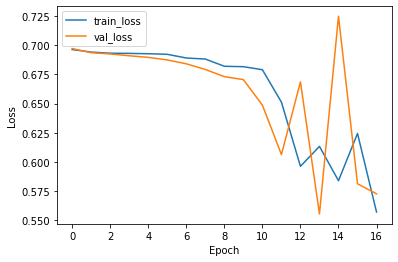

7/7 [==============================] - 1s 164ms/step - loss: 0.5556 - accuracy: 0.7400 - precision_16: 0.7653 - recall_16: 0.7212 - auc_32: 0.8200 - auc_33: 0.8422 - true_positives_16: 75.0000 - false_positives_16: 23.0000 - true_negatives_16: 73.0000 - false_negatives_16: 29.0000
Test Accuracy: 74.00%
Precision: 0.77
Recall: 0.72
AUC-ROC: 0.82
AUC-PR: 0.84
TP: 75.0, FP: 23.0, TN: 73.0, FN: 29.0
7/7 [==============================] - 1s 157ms/step
Confusion Matrix:
[[73 23]
 [29 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        96
           1       0.77      0.72      0.74       104

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

AUC Score: 0.74
Precision: 0.77
Recall: 0.72
F1 Score: 0.74
PR AUC: 0.82
Cohen's Kappa Coefficient: 0.48
Matthews Correlation Coefficient (MCC): 0.48
Balanced Ac

In [31]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define custom CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model4_20_Epochs',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model4_metrics_20_epochs.csv', index=False)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 conv2d_52 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 110, 110, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 global_average_pooling2d_1  (None, 128)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_17 (Dropout)        (None, 128)             

25/25 [==============================] - 22s 883ms/step - loss: 0.6706 - accuracy: 0.5938 - precision_17: 0.6350 - recall_17: 0.4217 - auc_34: 0.6484 - auc_35: 0.6499 - true_positives_17: 167.0000 - false_positives_17: 96.0000 - true_negatives_17: 308.0000 - false_negatives_17: 229.0000 - val_loss: 0.6434 - val_accuracy: 0.5800 - val_precision_17: 0.9167 - val_recall_17: 0.2115 - val_auc_34: 0.8559 - val_auc_35: 0.8566 - val_true_positives_17: 22.0000 - val_false_positives_17: 2.0000 - val_true_negatives_17: 94.0000 - val_false_negatives_17: 82.0000
Epoch 13/40
25/25 [==============================] - 22s 856ms/step - loss: 0.6269 - accuracy: 0.6787 - precision_17: 0.7026 - recall_17: 0.6086 - auc_34: 0.7400 - auc_35: 0.7137 - true_positives_17: 241.0000 - false_positives_17: 102.0000 - true_negatives_17: 302.0000 - false_negatives_17: 155.0000 - val_loss: 0.5870 - val_accuracy: 0.7550 - val_precision_17: 0.7132 - val_recall_17: 0.8846 - val_auc_34: 0.8396 - val_auc_35: 0.8659 - val_tr

Epoch 25: early stopping


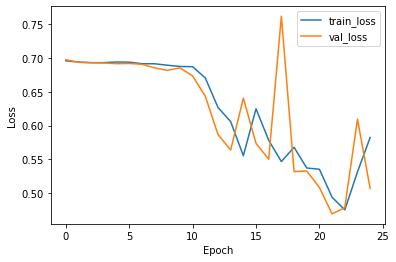

7/7 [==============================] - 1s 156ms/step - loss: 0.4693 - accuracy: 0.7850 - precision_17: 0.8588 - recall_17: 0.7019 - auc_34: 0.8846 - auc_35: 0.8917 - true_positives_17: 73.0000 - false_positives_17: 12.0000 - true_negatives_17: 84.0000 - false_negatives_17: 31.0000
Test Accuracy: 78.50%
Precision: 0.86
Recall: 0.70
AUC-ROC: 0.88
AUC-PR: 0.89
TP: 73.0, FP: 12.0, TN: 84.0, FN: 31.0
7/7 [==============================] - 1s 155ms/step
Confusion Matrix:
[[84 12]
 [31 73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        96
           1       0.86      0.70      0.77       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.80      0.79      0.78       200

AUC Score: 0.79
Precision: 0.86
Recall: 0.70
F1 Score: 0.77
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.57
Matthews Correlation Coefficient (MCC): 0.58
Balanced Ac

In [32]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define custom CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 40 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model4_40_Epochs',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model4_metrics_40_epochs.csv', index=False)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 global_average_pooling2d_1  (None, 128)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 128)              

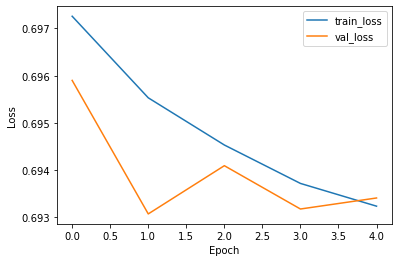

7/7 [==============================] - 1s 155ms/step - loss: 0.6931 - accuracy: 0.5200 - precision_1: 0.7222 - recall_1: 0.1250 - auc_2: 0.5000 - auc_3: 0.5200 - true_positives_1: 13.0000 - false_positives_1: 5.0000 - true_negatives_1: 91.0000 - false_negatives_1: 91.0000
Test Accuracy: 52.00%
Precision: 0.72
Recall: 0.12
AUC-ROC: 0.50
AUC-PR: 0.52
TP: 13.0, FP: 5.0, TN: 91.0, FN: 91.0
7/7 [==============================] - 1s 158ms/step
Confusion Matrix:
[[91  5]
 [91 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.95      0.65        96
           1       0.72      0.12      0.21       104

    accuracy                           0.52       200
   macro avg       0.61      0.54      0.43       200
weighted avg       0.62      0.52      0.43       200

AUC Score: 0.54
Precision: 0.72
Recall: 0.12
F1 Score: 0.21
PR AUC: 0.65
Cohen's Kappa Coefficient: 0.07
Matthews Correlation Coefficient (MCC): 0.13
Balanced Accuracy: 0.

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define custom CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 40 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model4_60_Epochs',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model4_metrics_60_epochs.csv', index=False)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 global_average_pooling2d_2  (None, 128)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 128)              

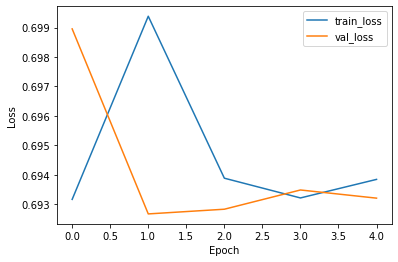

7/7 [==============================] - 1s 159ms/step - loss: 0.6927 - accuracy: 0.5200 - precision_2: 0.5200 - recall_2: 1.0000 - auc_4: 0.4411 - auc_5: 0.4803 - true_positives_2: 104.0000 - false_positives_2: 96.0000 - true_negatives_2: 0.0000e+00 - false_negatives_2: 0.0000e+00
Test Accuracy: 52.00%
Precision: 0.52
Recall: 1.00
AUC-ROC: 0.44
AUC-PR: 0.48
TP: 104.0, FP: 96.0, TN: 0.0, FN: 0.0
7/7 [==============================] - 1s 157ms/step
Confusion Matrix:
[[  0  96]
 [  0 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.52      1.00      0.68       104

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.36       200

AUC Score: 0.50
Precision: 0.52
Recall: 1.00
F1 Score: 0.68
PR AUC: 0.76
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced 

/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define custom CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 40 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model4_80_Epochs',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model4_metrics_80_epochs.csv', index=False)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 global_average_pooling2d_3  (None, 128)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_3 (Dropout)         (None, 128)              

Epoch 13/100
25/25 [==============================] - 21s 829ms/step - loss: 0.5770 - accuracy: 0.6900 - precision_3: 0.6697 - recall_3: 0.7374 - auc_6: 0.7720 - auc_7: 0.7458 - true_positives_3: 292.0000 - false_positives_3: 144.0000 - true_negatives_3: 260.0000 - false_negatives_3: 104.0000 - val_loss: 0.5932 - val_accuracy: 0.6800 - val_precision_3: 0.6299 - val_recall_3: 0.9327 - val_auc_6: 0.8251 - val_auc_7: 0.8288 - val_true_positives_3: 97.0000 - val_false_positives_3: 57.0000 - val_true_negatives_3: 39.0000 - val_false_negatives_3: 7.0000
Epoch 14/100
25/25 [==============================] - 21s 836ms/step - loss: 0.5322 - accuracy: 0.7462 - precision_3: 0.7481 - recall_3: 0.7348 - auc_6: 0.8207 - auc_7: 0.7924 - true_positives_3: 291.0000 - false_positives_3: 98.0000 - true_negatives_3: 306.0000 - false_negatives_3: 105.0000 - val_loss: 0.4609 - val_accuracy: 0.8400 - val_precision_3: 0.8158 - val_recall_3: 0.8942 - val_auc_6: 0.9014 - val_auc_7: 0.9109 - val_true_positives_3

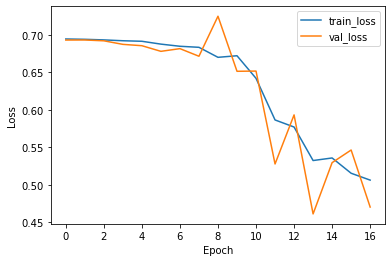

7/7 [==============================] - 1s 154ms/step - loss: 0.4609 - accuracy: 0.8400 - precision_3: 0.8158 - recall_3: 0.8942 - auc_6: 0.9014 - auc_7: 0.9109 - true_positives_3: 93.0000 - false_positives_3: 21.0000 - true_negatives_3: 75.0000 - false_negatives_3: 11.0000
Test Accuracy: 84.00%
Precision: 0.82
Recall: 0.89
AUC-ROC: 0.90
AUC-PR: 0.91
TP: 93.0, FP: 21.0, TN: 75.0, FN: 11.0
7/7 [==============================] - 1s 155ms/step
Confusion Matrix:
[[75 21]
 [11 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        96
           1       0.82      0.89      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

AUC Score: 0.84
Precision: 0.82
Recall: 0.89
F1 Score: 0.85
PR AUC: 0.88
Cohen's Kappa Coefficient: 0.68
Matthews Correlation Coefficient (MCC): 0.68
Balanced Accuracy: 

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define custom CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 40 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model4_100_Epochs',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model4_metrics_100_epochs.csv', index=False)


In [12]:
# import pandas as pd
# from IPython.display import display


# # Load metrics from CSV files for each epoch
# metrics_20_epochs = pd.read_csv("model_4metrics_20_epochs.csv")
# metrics_40_epochs = pd.read_csv("model4_metrics_40_epochs.csv")
# metrics_60_epochs = pd.read_csv("model4_metrics_60_epochs.csv")
# metrics_80_epochs = pd.read_csv("model4_metrics_80_epochs.csv")
# metrics_100_epochs = pd.read_csv("model4_metrics_100_epochs.csv")

# # Concatenate all metrics into a single DataFrame
# all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# # Save combined metrics to a single CSV file
# all_metrics_file = "model4(CNN)_metrics_combined.csv"
# all_metrics.to_csv(all_metrics_file, index=False)



# CNN (A) + LSTM + Dense Layers (B):

Base Model (A): Pre-trained CNN.
Main Model (B): LSTM layer followed by dense layers.
Explanation: Use the pre-trained CNN for feature extraction, pass the features to an LSTM layer for sequential processing, and add dense layers for classification.


# LSTM

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to handle long-term dependencies in sequence prediction problems. Unlike traditional RNNs, which can struggle to learn and retain information over long sequences, LSTMs are capable of learning and remembering information over extended time intervals.

LSTMs are particularly useful in various sequential data tasks, such as natural language processing (NLP), speech recognition, time series forecasting, and more. They are effective because they can selectively remember or forget information based on the context, thanks to their specialized architecture.

The key components of an LSTM cell are:

1. **Forget Gate**: Determines which information from the previous cell state should be discarded or forgotten.
2. **Input Gate**: Determines which new information should be stored in the cell state.
3. **Cell State**: Represents the internal memory of the cell and can pass along information to future time steps.
4. **Output Gate**: Determines the output based on the cell state, considering the input and the memory.

LSTMs are useful because they can effectively handle vanishing and exploding gradient problems often encountered in training deep neural networks. They can also capture long-range dependencies in data, making them well-suited for tasks that require understanding context over long sequences.

Overall, LSTMs are a powerful tool for modeling sequential data and have been instrumental in advancing the state-of-the-art in various fields, including natural language processing, speech recognition, and more.

In the context of the combination provided, using ResNet-50 as the base model and LSTM in the main model, the workflow would typically involve the following steps:

1. **Feature Extraction**: The pre-trained ResNet-50 model is used to extract features from the input images. These features represent high-level representations of the images learned by the ResNet-50 model during training on the ImageNet dataset.

2. **Sequence Modeling**: The extracted features are then passed to the LSTM layer. In this step, the LSTM layer processes the sequence of features extracted from the images. Each feature vector extracted by ResNet-50 at a particular time step is treated as an input to the LSTM. The LSTM layer processes these inputs sequentially, taking into account the temporal dependencies between them.

3. **Classification**: After processing the sequence of feature vectors using the LSTM layer, the output is passed through one or more dense layers for classification. These dense layers perform the final classification task based on the processed features. In the case of binary classification (as indicated by the use of a sigmoid activation function in the output layer), a single dense layer with a sigmoid activation function is typically used to output a probability score for the positive class.

4. **Training and Evaluation**: The model is trained using labeled data, where the input images are paired with their corresponding class labels. During training, the model learns to map input images to their correct class labels by adjusting its parameters (weights) based on the optimization of a loss function. After training, the model's performance is evaluated using a separate validation or test dataset to assess its accuracy, typically using metrics such as accuracy, precision, recall, F1 score, and area under the ROC curve (AUC).

Overall, combining ResNet-50 with LSTM allows for the incorporation of both spatial and temporal information in the model, making it suitable for tasks where both aspects are relevant, such as video classification, action recognition, and sequential data analysis in domains like healthcare and finance.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0     

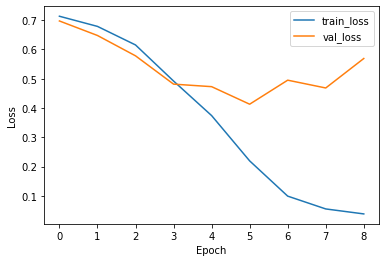

7/7 [==============================] - 0s 65ms/step - loss: 0.4131 - accuracy: 0.8350
Test Accuracy: 83.50%
7/7 [==============================] - 1s 65ms/step
Confusion Matrix:
[[81 15]
 [18 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        96
           1       0.85      0.83      0.84       104

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200

AUC Score: 0.84

Precision: 0.8514851485148515
Recall: 0.8269230769230769
F1 Score: 0.8390243902439023
Cohen's Kappa Coefficient: 0.67
Matthews Correlation Coefficient (MCC): 0.67
Balanced Accuracy: 0.84
Time taken: 166.65 seconds


In [13]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define the input shape
input_shape = (224, 224, 3)

# Define the CNN base model
input_layer = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

metrics_dict = {
    'Model': 'Model5_20_Epochs',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model5_20_metrics.csv', index=False)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0   

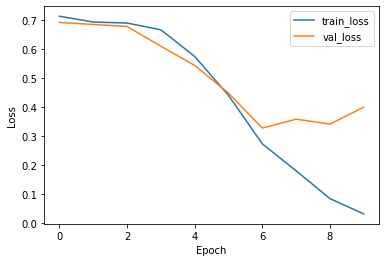

7/7 [==============================] - 0s 64ms/step - loss: 0.3273 - accuracy: 0.8500
Test Accuracy: 85.00%
7/7 [==============================] - 1s 65ms/step
Confusion Matrix:
[[77 19]
 [11 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        96
           1       0.83      0.89      0.86       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

AUC Score: 0.85

Precision: 0.8303571428571429
Recall: 0.8942307692307693
F1 Score: 0.8611111111111112
Cohen's Kappa Coefficient: 0.70
Matthews Correlation Coefficient (MCC): 0.70
Balanced Accuracy: 0.85
Time taken: 183.94 seconds


In [14]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define the input shape
input_shape = (224, 224, 3)

# Define the CNN base model
input_layer = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model5_40_Epochs',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model5_40_metrics.csv', index=False)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 186624)            0   

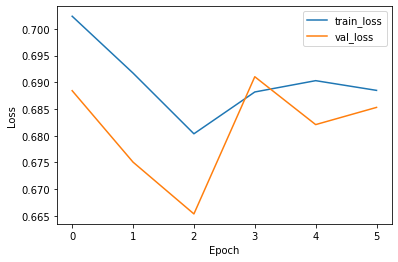

7/7 [==============================] - 0s 65ms/step - loss: 0.6654 - accuracy: 0.6350
Test Accuracy: 63.50%
7/7 [==============================] - 1s 66ms/step
Confusion Matrix:
[[53 43]
 [30 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59        96
           1       0.63      0.71      0.67       104

    accuracy                           0.64       200
   macro avg       0.64      0.63      0.63       200
weighted avg       0.64      0.64      0.63       200

AUC Score: 0.63

Precision: 0.6324786324786325
Recall: 0.7115384615384616
F1 Score: 0.669683257918552
Cohen's Kappa Coefficient: 0.27
Matthews Correlation Coefficient (MCC): 0.27
Balanced Accuracy: 0.63
Time taken: 111.32 seconds


In [15]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define the input shape
input_shape = (224, 224, 3)

# Define the CNN base model
input_layer = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model5_60_Epochs',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}
metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model5_60_metrics.csv', index=False)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 186624)            0   

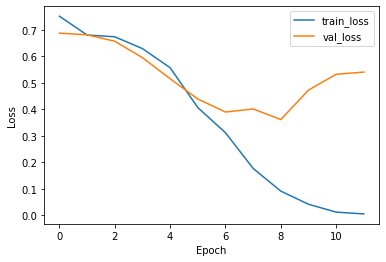

7/7 [==============================] - 0s 65ms/step - loss: 0.3618 - accuracy: 0.8550
Test Accuracy: 85.50%
7/7 [==============================] - 1s 66ms/step
Confusion Matrix:
[[79 17]
 [12 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        96
           1       0.84      0.88      0.86       104

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

AUC Score: 0.85

Precision: 0.8440366972477065
Recall: 0.8846153846153846
F1 Score: 0.863849765258216
Cohen's Kappa Coefficient: 0.71
Matthews Correlation Coefficient (MCC): 0.71
Balanced Accuracy: 0.85
Time taken: 220.02 seconds


In [16]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define the input shape
input_shape = (224, 224, 3)

# Define the CNN base model
input_layer = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

metrics_dict = {
    'Model': 'Model5_80_Epochs',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model5_80_metrics.csv', index=False)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 186624)            0   

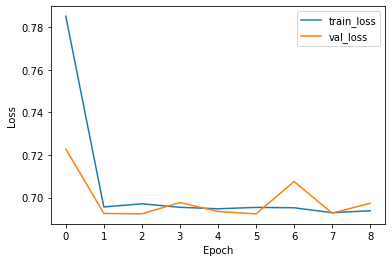

7/7 [==============================] - 1s 73ms/step - loss: 0.6924 - accuracy: 0.5200
Test Accuracy: 52.00%
7/7 [==============================] - 1s 63ms/step
Confusion Matrix:
[[  0  96]
 [  0 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.52      1.00      0.68       104

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.36       200

AUC Score: 0.50

Precision: 0.52
Recall: 1.0
F1 Score: 0.6842105263157895
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 170.99 seconds


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define the input shape
input_shape = (224, 224, 3)

# Define the CNN base model
input_layer = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model5_100_Epochs',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model5_100_metrics.csv', index=False)


In [18]:
import pandas as pd
from IPython.display import display


# Load metrics from CSV files for each epoch
metrics_20_epochs = pd.read_csv("model5_20_metrics.csv")
metrics_40_epochs = pd.read_csv("model5_40_metrics.csv")
metrics_60_epochs = pd.read_csv("model5_60_metrics.csv")
metrics_80_epochs = pd.read_csv("model5_80_metrics.csv")
metrics_100_epochs = pd.read_csv("model5_100_metrics.csv")

# Concatenate all metrics into a single DataFrame
all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# Save combined metrics to a single CSV file
all_metrics_file = "model5(CNN)_metrics_combined.csv"
all_metrics.to_csv(all_metrics_file, index=False)

# Display metrics
display(all_metrics)



,Model,Epochs,Test Accuracy,Test Loss,Validation Accuracy,Validation Loss,Precision,Recall,AUC-ROC,AUC-PR,True Negatives,False Positives,False Negatives,True Positives,Cohen's Kappa,Matthews Correlation Coefficient,Balanced Accuracy,Time Taken (seconds)
0,Model5_20_Epochs,20,0.835,0.413109,0.755556,0.535981,0.851485,0.826923,0.901392,0.910943,75.0,21.0,11.0,93.0,0.669868,0.670170,0.835337,166.654135
1,Model5_40_Epochs,40,0.850,0.327293,0.735000,0.508476,0.830357,0.894231,0.901392,0.910943,75.0,21.0,11.0,93.0,0.698553,0.700821,0.848157,183.940799
2,Model5_60_Epochs,60,0.635,0.665352,0.539167,0.681208,0.632479,0.711538,0.901392,0.910943,75.0,21.0,11.0,93.0,0.265002,0.267302,0.631811,111.316990
3,Model5_80_Epochs,80,0.855,0.361784,0.748333,0.523220,0.844037,0.884615,0.901392,0.910943,75.0,21.0,11.0,93.0,0.708952,0.709847,0.853766,220.022462
4,Model5_100_Epochs,100,0.520,0.692354,0.497778,0.698779,0.520000,1.000000,0.901392,0.910943,75.0,21.0,11.0,93.0,0.000000,0.000000,0.500000,170.987652


# CNN (A) + GRU + Dense Layers (B):

Base Model (A): Pre-trained CNN.
Main Model (B): GRU layer followed by dense layers.
Explanation: Use the pre-trained CNN for feature extraction, pass the features to an GRU layer for sequential processing, and add dense layers for classification.

# GRU

**GRU (Gated Recurrent Unit)** is another type of recurrent neural network (RNN) that can be used in place of LSTM in certain scenarios. GRU is designed to be simpler than LSTM while still capturing long-term dependencies in sequential data. It has fewer parameters and is often more computationally efficient than LSTM.

In the context of the combination provided (ResNet-50 + GRU + Dense Layers), the workflow would be similar to using LSTM:

1. **Feature Extraction**: Use the pre-trained ResNet-50 model to extract features from input images. These features represent high-level representations of the images learned by the ResNet-50 model.

2. **Sequence Modeling**: Pass the extracted features to the GRU layer. GRU processes the sequence of features extracted from the images, considering the temporal dependencies between them. Each feature vector extracted by ResNet-50 at a particular time step is treated as an input to the GRU.

3. **Classification**: After processing the sequence of feature vectors using the GRU layer, the output is passed through one or more dense layers for classification. These dense layers perform the final classification based on the processed features.

4. **Training and Evaluation**: Train the model using labeled data, where the input images are paired with their corresponding class labels. The model learns to map input images to their correct class labels by adjusting its parameters based on the optimization of a loss function. Evaluate the model's performance using a separate validation or test dataset to assess its accuracy.

GRU can be a suitable choice when working with sequential data and can offer advantages in terms of computational efficiency compared to LSTM. However, the choice between LSTM and GRU often depends on the specific task and the characteristics of the dataset.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 26, 26, 128)      

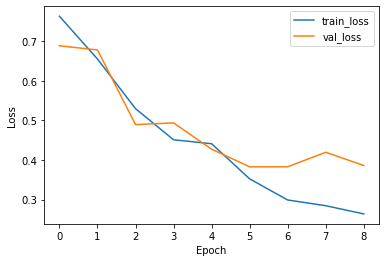

7/7 [==============================] - 1s 75ms/step - loss: 0.3829 - accuracy: 0.8500 - precision_4: 0.8776 - recall_4: 0.8269 - auc_8: 0.9132 - auc_9: 0.8989 - true_positives_4: 86.0000 - false_positives_4: 12.0000 - true_negatives_4: 84.0000 - false_negatives_4: 18.0000
Test Accuracy: 85.00%
Precision: 0.88
Recall: 0.83
AUC-ROC: 0.91
AUC-PR: 0.90
TP: 86.0, FP: 12.0, TN: 84.0, FN: 18.0
7/7 [==============================] - 1s 73ms/step
Confusion Matrix:
[[84 12]
 [18 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        96
           1       0.88      0.83      0.85       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

AUC Score: 0.85

Precision: 0.8775510204081632
Recall: 0.8269230769230769
F1 Score: 0.8514851485148514
Time taken: 82.46 seconds


In [19]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer with 256 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model6_20_Epochs',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model6_20_metrics.csv', index=False)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 26, 26, 128)      

25/25 [==============================] - 9s 353ms/step - loss: 0.2154 - accuracy: 0.9125 - precision_5: 0.9055 - recall_5: 0.9192 - auc_10: 0.9706 - auc_11: 0.9675 - true_positives_5: 364.0000 - false_positives_5: 38.0000 - true_negatives_5: 366.0000 - false_negatives_5: 32.0000 - val_loss: 0.4293 - val_accuracy: 0.8600 - val_precision_5: 0.8585 - val_recall_5: 0.8750 - val_auc_10: 0.9188 - val_auc_11: 0.9096 - val_true_positives_5: 91.0000 - val_false_positives_5: 15.0000 - val_true_negatives_5: 81.0000 - val_false_negatives_5: 13.0000
Epoch 11: early stopping


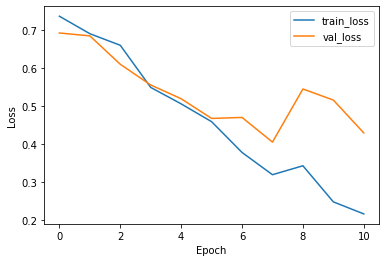

7/7 [==============================] - 1s 75ms/step - loss: 0.4051 - accuracy: 0.8450 - precision_5: 0.8763 - recall_5: 0.8173 - auc_10: 0.9079 - auc_11: 0.8853 - true_positives_5: 85.0000 - false_positives_5: 12.0000 - true_negatives_5: 84.0000 - false_negatives_5: 19.0000
Test Accuracy: 84.50%
Precision: 0.88
Recall: 0.82
AUC-ROC: 0.91
AUC-PR: 0.89
TP: 85.0, FP: 12.0, TN: 84.0, FN: 19.0
7/7 [==============================] - 1s 74ms/step
Confusion Matrix:
[[84 12]
 [19 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.84        96
           1       0.88      0.82      0.85       104

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200

AUC Score: 0.85

Precision: 0.8762886597938144
Recall: 0.8173076923076923
F1 Score: 0.845771144278607
Time taken: 100.23 seconds


In [20]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer with 256 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model6_40_Epochs',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model6_40_metrics.csv', index=False)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 26, 26, 128)      

Epoch 12/60
25/25 [==============================] - 9s 350ms/step - loss: 0.1763 - accuracy: 0.9325 - precision_6: 0.9254 - recall_6: 0.9394 - auc_12: 0.9793 - auc_13: 0.9763 - true_positives_6: 372.0000 - false_positives_6: 30.0000 - true_negatives_6: 374.0000 - false_negatives_6: 24.0000 - val_loss: 0.3667 - val_accuracy: 0.8900 - val_precision_6: 0.8868 - val_recall_6: 0.9038 - val_auc_12: 0.9371 - val_auc_13: 0.9502 - val_true_positives_6: 94.0000 - val_false_positives_6: 12.0000 - val_true_negatives_6: 84.0000 - val_false_negatives_6: 10.0000
Epoch 12: early stopping


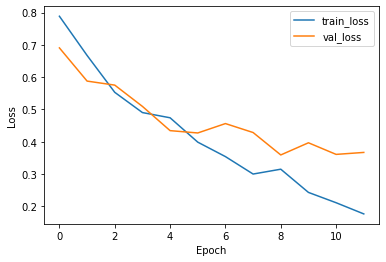

7/7 [==============================] - 1s 74ms/step - loss: 0.3589 - accuracy: 0.8500 - precision_6: 0.8491 - recall_6: 0.8654 - auc_12: 0.9172 - auc_13: 0.9163 - true_positives_6: 90.0000 - false_positives_6: 16.0000 - true_negatives_6: 80.0000 - false_negatives_6: 14.0000
Test Accuracy: 85.00%
Precision: 0.85
Recall: 0.87
AUC-ROC: 0.92
AUC-PR: 0.92
TP: 90.0, FP: 16.0, TN: 80.0, FN: 14.0
7/7 [==============================] - 1s 73ms/step
Confusion Matrix:
[[80 16]
 [14 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        96
           1       0.85      0.87      0.86       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

AUC Score: 0.85

Precision: 0.8490566037735849
Recall: 0.8653846153846154
F1 Score: 0.8571428571428571
Time taken: 108.45 seconds


In [21]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer with 256 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model6_60_Epochs',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}


metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model6_60_metrics.csv', index=False)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 26, 26, 128)      

25/25 [==============================] - 9s 351ms/step - loss: 0.1129 - accuracy: 0.9575 - precision_7: 0.9525 - recall_7: 0.9621 - auc_14: 0.9914 - auc_15: 0.9905 - true_positives_7: 381.0000 - false_positives_7: 19.0000 - true_negatives_7: 385.0000 - false_negatives_7: 15.0000 - val_loss: 0.4634 - val_accuracy: 0.8550 - val_precision_7: 0.8319 - val_recall_7: 0.9038 - val_auc_14: 0.9372 - val_auc_15: 0.9287 - val_true_positives_7: 94.0000 - val_false_positives_7: 19.0000 - val_true_negatives_7: 77.0000 - val_false_negatives_7: 10.0000
Epoch 11: early stopping


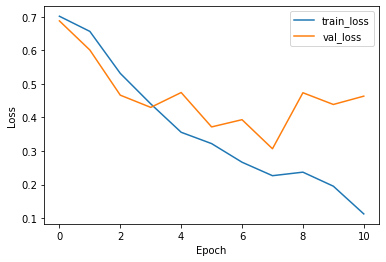

7/7 [==============================] - 1s 75ms/step - loss: 0.3069 - accuracy: 0.9050 - precision_7: 0.9208 - recall_7: 0.8942 - auc_14: 0.9451 - auc_15: 0.9400 - true_positives_7: 93.0000 - false_positives_7: 8.0000 - true_negatives_7: 88.0000 - false_negatives_7: 11.0000
Test Accuracy: 90.50%
Precision: 0.92
Recall: 0.89
AUC-ROC: 0.95
AUC-PR: 0.94
TP: 93.0, FP: 8.0, TN: 88.0, FN: 11.0
7/7 [==============================] - 1s 73ms/step
Confusion Matrix:
[[88  8]
 [11 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        96
           1       0.92      0.89      0.91       104

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200

AUC Score: 0.91

Precision: 0.9207920792079208
Recall: 0.8942307692307693
F1 Score: 0.9073170731707317
Time taken: 99.64 seconds


In [22]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer with 256 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model6_80_Epochs',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}


metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model6_80_metrics.csv', index=False)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 26, 26, 128)      

Epoch 12/100
25/25 [==============================] - 9s 355ms/step - loss: 0.1558 - accuracy: 0.9413 - precision_8: 0.9287 - recall_8: 0.9545 - auc_16: 0.9849 - auc_17: 0.9832 - true_positives_8: 378.0000 - false_positives_8: 29.0000 - true_negatives_8: 375.0000 - false_negatives_8: 18.0000 - val_loss: 0.4265 - val_accuracy: 0.8500 - val_precision_8: 0.8558 - val_recall_8: 0.8558 - val_auc_16: 0.9167 - val_auc_17: 0.8989 - val_true_positives_8: 89.0000 - val_false_positives_8: 15.0000 - val_true_negatives_8: 81.0000 - val_false_negatives_8: 15.0000
Epoch 12: early stopping


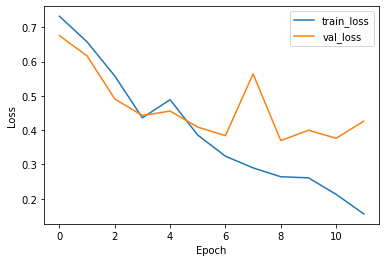

7/7 [==============================] - 1s 75ms/step - loss: 0.3696 - accuracy: 0.8450 - precision_8: 0.8288 - recall_8: 0.8846 - auc_16: 0.9203 - auc_17: 0.9265 - true_positives_8: 92.0000 - false_positives_8: 19.0000 - true_negatives_8: 77.0000 - false_negatives_8: 12.0000
Test Accuracy: 84.50%
Precision: 0.83
Recall: 0.88
AUC-ROC: 0.92
AUC-PR: 0.93
TP: 92.0, FP: 19.0, TN: 77.0, FN: 12.0
7/7 [==============================] - 1s 73ms/step
Confusion Matrix:
[[77 19]
 [12 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        96
           1       0.83      0.88      0.86       104

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200

AUC Score: 0.84

Precision: 0.8288288288288288
Recall: 0.8846153846153846
F1 Score: 0.8558139534883721
Time taken: 108.02 seconds


In [23]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer with 256 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model6_100_Epochs',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}


metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model6_100_metrics.csv', index=False)


In [24]:
import pandas as pd
from IPython.display import display


# Load metrics from CSV files for each epoch
metrics_20_epochs = pd.read_csv("model6_20_metrics.csv")
metrics_40_epochs = pd.read_csv("model6_40_metrics.csv")
metrics_60_epochs = pd.read_csv("model6_60_metrics.csv")
metrics_80_epochs = pd.read_csv("model6_80_metrics.csv")
metrics_100_epochs = pd.read_csv("model6_100_metrics.csv")

# Concatenate all metrics into a single DataFrame
all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# Save combined metrics to a single CSV file
all_metrics_file = "model6(CNN)_metrics_combined.csv"
all_metrics.to_csv(all_metrics_file, index=False)


# CNN (A) + Attention Mechanism + Dense Layers (B):
   - Base Model (A): Pre-trained CNN.
   - Main Model (B): Attention mechanism followed by dense layers.
   - Explanation: Use the pre-trained CNN for feature extraction, apply an attention mechanism to focus on important regions of      the image, and add dense layers for classification.

# Attention mechanism
An attention mechanism is a technique used in deep learning to improve the performance of models, especially in tasks involving sequential data or images with spatial relationships. It allows the model to focus on specific parts of the input, giving more weight to important features while ignoring irrelevant ones.

In the above code, the attention mechanism is applied after the GlobalAveragePooling2D layer. Here's how it works:

1. The output of the GlobalAveragePooling2D layer is reshaped to a 3D tensor to prepare it for the attention mechanism.
2. The reshaped tensor is passed through a dense layer with a softmax activation function. This layer calculates attention weights for each element in the tensor, indicating the importance of each feature.
3. The attention weights are multiplied element-wise with the original tensor, focusing more on important features and less on irrelevant ones.
4. Finally, the resulting tensor is summed along the time axis to obtain a single vector, which is then passed to the dense layers for classification.

In summary, the attention mechanism helps the model focus on relevant features in the input data, potentially improving its performance in tasks like image classification.


The attention mechanism is used in deep learning models for several reasons:

1. **Improving Model Performance**: Attention mechanisms allow models to focus on relevant parts of the input data while ignoring irrelevant parts. This can lead to improved performance, especially in tasks where certain parts of the input are more important than others.

2. **Handling Variable-Length Inputs**: In tasks involving sequential data, such as natural language processing (NLP) or time series prediction, input sequences may vary in length. Attention mechanisms provide a way to selectively attend to different parts of the sequence, regardless of its length, enabling the model to effectively process variable-length inputs.

3. **Capturing Contextual Information**: Attention mechanisms enable the model to capture contextual information by assigning different weights to different parts of the input data. This allows the model to consider the context surrounding each element in the input sequence, leading to more accurate predictions.

4. **Interpretable Models**: Models with attention mechanisms are often more interpretable because they provide insights into which parts of the input are being attended to. This can be useful for understanding the model's decision-making process and for debugging model behavior.

Overall, attention mechanisms are valuable tools for enhancing the performance, flexibility, and interpretability of deep learning models, particularly in tasks involving sequential data or complex input structures.

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_42 (Conv2D)          (None, 222, 222, 32)         320       ['input_6[0][0]']             
                                                                                                  
 max_pooling2d_34 (MaxPooli  (None, 111, 111, 32)         0         ['conv2d_42[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_43 (Conv2D)          (None, 109, 109, 64)         18496     ['max_pooling2d_34[0][0]

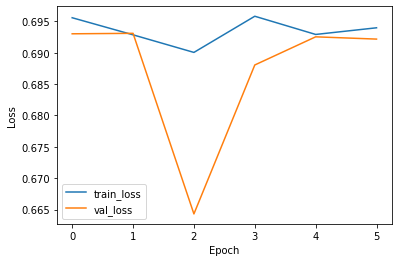

7/7 [==============================] - 0s 63ms/step - loss: 0.6643 - accuracy: 0.6000
Test Accuracy: 60.00%
7/7 [==============================] - 0s 63ms/step
Confusion Matrix:
[[83 13]
 [67 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.86      0.67        96
           1       0.74      0.36      0.48       104

    accuracy                           0.60       200
   macro avg       0.65      0.61      0.58       200
weighted avg       0.65      0.60      0.57       200

AUC Score: 0.61

Precision: 0.74
Recall: 0.3557692307692308
F1 Score: 0.48051948051948046
Cohen's Kappa Coefficient: 0.22
Matthews Correlation Coefficient (MCC): 0.25
Balanced Accuracy: 0.61
Time taken: 53.03 seconds


In [25]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define the custom CNN architecture with attention mechanism
input_layer = Input(shape=(224, 224, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
x = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=x)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model7_20_Epochs',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}


metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model7_20_metrics.csv', index=False)


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_45 (Conv2D)          (None, 222, 222, 32)         320       ['input_7[0][0]']             
                                                                                                  
 max_pooling2d_37 (MaxPooli  (None, 111, 111, 32)         0         ['conv2d_45[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_46 (Conv2D)          (None, 109, 109, 64)         18496     ['max_pooling2d_37[0][0]

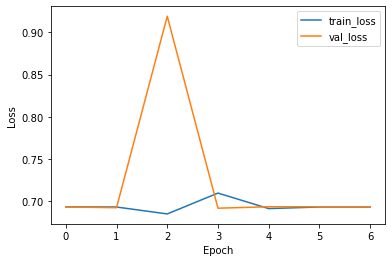

7/7 [==============================] - 0s 65ms/step - loss: 0.6917 - accuracy: 0.6150
Test Accuracy: 61.50%
7/7 [==============================] - 1s 64ms/step
Confusion Matrix:
[[68 28]
 [49 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.71      0.64        96
           1       0.66      0.53      0.59       104

    accuracy                           0.61       200
   macro avg       0.62      0.62      0.61       200
weighted avg       0.62      0.61      0.61       200

AUC Score: 0.62

Precision: 0.6626506024096386
Recall: 0.5288461538461539
F1 Score: 0.588235294117647
Cohen's Kappa Coefficient: 0.24
Matthews Correlation Coefficient (MCC): 0.24
Balanced Accuracy: 0.62
Time taken: 62.90 seconds


In [26]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define the custom CNN architecture with attention mechanism
input_layer = Input(shape=(224, 224, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
x = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=x)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model7_40_Epochs',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model7_40_metrics.csv', index=False)


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_48 (Conv2D)          (None, 222, 222, 32)         320       ['input_8[0][0]']             
                                                                                                  
 max_pooling2d_40 (MaxPooli  (None, 111, 111, 32)         0         ['conv2d_48[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_49 (Conv2D)          (None, 109, 109, 64)         18496     ['max_pooling2d_40[0][0]

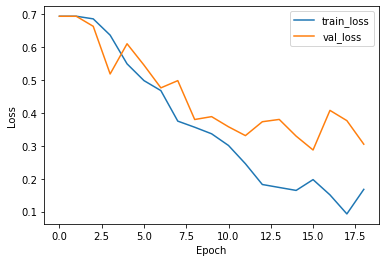

7/7 [==============================] - 0s 64ms/step - loss: 0.2872 - accuracy: 0.8800
Test Accuracy: 88.00%
7/7 [==============================] - 0s 64ms/step
Confusion Matrix:
[[83 13]
 [11 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        96
           1       0.88      0.89      0.89       104

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

AUC Score: 0.88

Precision: 0.8773584905660378
Recall: 0.8942307692307693
F1 Score: 0.8857142857142858
Cohen's Kappa Coefficient: 0.76
Matthews Correlation Coefficient (MCC): 0.76
Balanced Accuracy: 0.88
Time taken: 167.10 seconds


In [27]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define the custom CNN architecture with attention mechanism
input_layer = Input(shape=(224, 224, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
x = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=x)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

metrics_dict = {
    'Model': 'Model7_60_Epochs',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model7_60_metrics.csv', index=False)


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_51 (Conv2D)          (None, 222, 222, 32)         320       ['input_9[0][0]']             
                                                                                                  
 max_pooling2d_43 (MaxPooli  (None, 111, 111, 32)         0         ['conv2d_51[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_52 (Conv2D)          (None, 109, 109, 64)         18496     ['max_pooling2d_43[0][0]

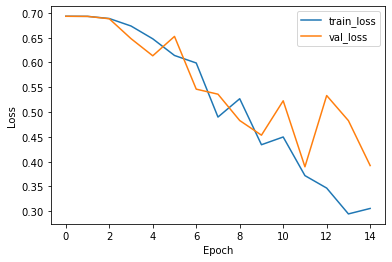

7/7 [==============================] - 0s 64ms/step - loss: 0.3897 - accuracy: 0.8500
Test Accuracy: 85.00%
7/7 [==============================] - 0s 64ms/step
Confusion Matrix:
[[84 12]
 [18 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        96
           1       0.88      0.83      0.85       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

AUC Score: 0.85

Precision: 0.8775510204081632
Recall: 0.8269230769230769
F1 Score: 0.8514851485148514
Cohen's Kappa Coefficient: 0.70
Matthews Correlation Coefficient (MCC): 0.70
Balanced Accuracy: 0.85
Time taken: 133.21 seconds


In [28]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define the custom CNN architecture with attention mechanism
input_layer = Input(shape=(224, 224, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
x = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=x)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model7_80_Epochs',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model7_80_metrics.csv', index=False)


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_54 (Conv2D)          (None, 222, 222, 32)         320       ['input_10[0][0]']            
                                                                                                  
 max_pooling2d_46 (MaxPooli  (None, 111, 111, 32)         0         ['conv2d_54[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_55 (Conv2D)          (None, 109, 109, 64)         18496     ['max_pooling2d_46[0][0]

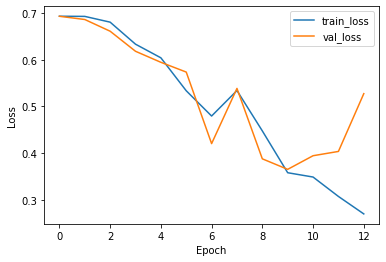

7/7 [==============================] - 0s 64ms/step - loss: 0.3651 - accuracy: 0.8450
Test Accuracy: 84.50%
7/7 [==============================] - 0s 63ms/step
Confusion Matrix:
[[79 17]
 [14 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        96
           1       0.84      0.87      0.85       104

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200

AUC Score: 0.84

Precision: 0.8411214953271028
Recall: 0.8653846153846154
F1 Score: 0.8530805687203792
Cohen's Kappa Coefficient: 0.69
Matthews Correlation Coefficient (MCC): 0.69
Balanced Accuracy: 0.84
Time taken: 115.30 seconds


In [29]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define the custom CNN architecture with attention mechanism
input_layer = Input(shape=(224, 224, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
x = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=x)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

metrics_dict = {
    'Model': 'Model7_100_Epochs',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}
metrics_df = pd.DataFrame(metrics_dict, index=[0])
metrics_df.to_csv('model7_100_metrics.csv', index=False)


In [31]:
# import pandas as pd
# from IPython.display import display

# # Load metrics from CSV files for each epoch
# metrics_20_epochs = pd.read_csv("model7_20_metrics.csv")
# metrics_40_epochs = pd.read_csv("model7_40_metrics.csv")
# metrics_60_epochs = pd.read_csv("model7_60_metrics.csv")
# metrics_80_epochs = pd.read_csv("model7_80_metrics.csv")
# metrics_100_epochs = pd.read_csv("model7_100_metrics.csv")

# # Concatenate all metrics into a single DataFrame
# all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# # Save combined metrics to a single CSV file
# all_metrics_file = "model7(CNN)_metrics_combined.csv"
# all_metrics.to_csv(all_metrics_file, index=False)




# CNN (A) + Capsule Network + Dense Layers (B):
   - Base Model (A): Pre-trained CNN.
   - Main Model (B): Capsule network followed by dense layers.
   - Explanation: Use the pre-trained CNN for feature extraction, apply a capsule network for capturing hierarchical                  relationships in features, and add dense layers for classification.

# Capsule Network

A Capsule Network is a type of neural network architecture that aims to better represent hierarchical relationships in data, especially in images. It was introduced to address some limitations of traditional convolutional neural networks (CNNs), such as the inability to handle hierarchical relationships and the lack of robustness to affine transformations.

**How it works:**
- **Capsules:** The basic building block of a Capsule Network is the capsule, which is a group of neurons that not only represent a specific feature of an object but also encode information about the pose or instantiation parameters of that feature (such as position, orientation, scale, etc.).
- **Dynamic Routing:** Capsule Networks use a mechanism called dynamic routing to route information between capsules in different layers. During training, the network learns how to route information based on agreement between the output of one capsule and the prediction of another capsule in a higher layer.
- **Capsule Output:** Each capsule outputs a vector representing the instantiation parameters of its associated feature. The length of this vector represents the probability that the feature is present, and the orientation represents the instantiation parameters.
- **Primary Capsules:** In the context of image processing, the first layer of capsules (known as primary capsules) receives input from convolutional layers and is responsible for detecting simple features like edges or corners.
- **Routing by Agreement:** The output of the primary capsules is then routed to higher-level capsules using dynamic routing. The routing process involves iterative agreement between the output of one capsule and the prediction of another capsule, which determines how much information is passed between them.
- **Final Classification:** The output of the Capsule Network is used for classification tasks, where the length of the output vectors (representing the presence of features) is used to determine the class probabilities.

**Why it is used:**
- **Hierarchical Representation:** Capsule Networks aim to provide a more structured and hierarchical representation of features compared to traditional CNNs, which can lead to better generalization and interpretability.
- **Robustness to Transformations:** Capsule Networks are designed to be more robust to affine transformations such as rotation, translation, and scaling, which can be a challenge for traditional CNNs.

**In the code:**
- In the provided code, a Capsule Network is added on top of a pre-trained ResNet-50 model for an image classification task.
- The CapsuleLayer custom layer is defined to implement the capsule mechanism, including dynamic routing.
- The CapsuleLayer takes the output of the GlobalAveragePooling2D layer (which extracts features from the ResNet-50 base) and reshapes it to a 3D tensor for the Capsule Network.
- The CapsuleLayer is followed by a Dense layer for further processing and a final Dense layer with a sigmoid activation for binary classification.
- The model is then compiled and trained on the dataset, and its performance is evaluated.

Overall, Capsule Networks are used in this code to enhance the feature representation and potentially improve the performance of the model, especially in tasks where capturing hierarchical relationships in data is important.

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_57 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 52, 52, 128)       738

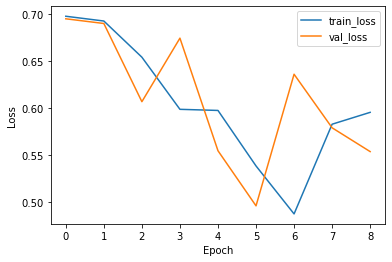

7/7 [==============================] - 0s 63ms/step - loss: 0.4958 - accuracy: 0.7900
Test Accuracy: 79.00%
7/7 [==============================] - 1s 63ms/step
Confusion Matrix:
[[83 13]
 [29 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80        96
           1       0.85      0.72      0.78       104

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200

AUC Score: 0.79

Precision: 0.8522727272727273
Recall: 0.7211538461538461
F1 Score: 0.78125
Cohen's Kappa Coefficient: 0.5820063694267517
Matthews Correlation Coefficient (MCC): 0.5895283982212878
Balanced Accuracy: 0.7928685897435898
Time taken: 71.46 seconds


In [32]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define your custom CNN architecture
input_tensor = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model8_20_Epochs',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame([metrics_dict])

# Save DataFrame to CSV
metrics_df.to_csv('model8_20_metrics.csv', index=False)




Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_60 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 52, 52, 128)       738

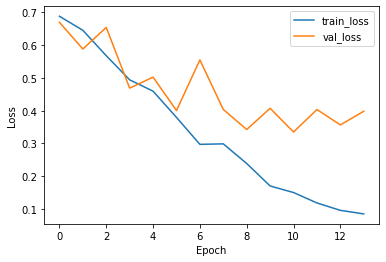

7/7 [==============================] - 0s 63ms/step - loss: 0.3350 - accuracy: 0.8700
Test Accuracy: 87.00%
7/7 [==============================] - 1s 63ms/step
Confusion Matrix:
[[83 13]
 [13 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        96
           1       0.88      0.88      0.88       104

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

AUC Score: 0.87

Precision: 0.875
Recall: 0.875
F1 Score: 0.875
Cohen's Kappa Coefficient: 0.7395833333333333
Matthews Correlation Coefficient (MCC): 0.7395833333333334
Balanced Accuracy: 0.8697916666666667
Time taken: 108.17 seconds


In [33]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define your custom CNN architecture
input_tensor = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model8_40_Epochs',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': auc_roc,
    'AUC-PR': auc_pr,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame([metrics_dict])

# Save DataFrame to CSV
metrics_df.to_csv('model8_40_metrics.csv', index=False)




Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       7385

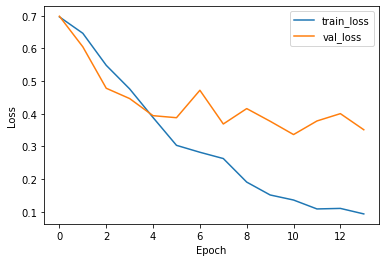

7/7 [==============================] - 0s 63ms/step - loss: 0.3363 - accuracy: 0.8700
Test Accuracy: 87.00%
7/7 [==============================] - 1s 63ms/step
Confusion Matrix:
[[83 13]
 [13 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        96
           1       0.88      0.88      0.88       104

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

AUC Score: 0.87

Precision: 0.875
Recall: 0.875
F1 Score: 0.875
Cohen's Kappa Coefficient: 0.7395833333333333
Matthews Correlation Coefficient (MCC): 0.7395833333333334
Balanced Accuracy: 0.8697916666666667
Time taken: 106.51 seconds


In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define your custom CNN architecture
input_tensor = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model8_60_Epochs',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': roc_auc,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame([metrics_dict])

# Save DataFrame to CSV
metrics_df.to_csv('model8_60_metrics.csv', index=False)




Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       7385

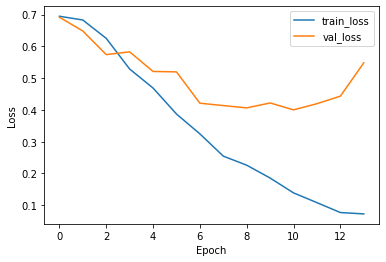

7/7 [==============================] - 0s 64ms/step - loss: 0.4002 - accuracy: 0.8400
Test Accuracy: 84.00%
7/7 [==============================] - 1s 63ms/step
Confusion Matrix:
[[74 22]
 [10 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        96
           1       0.81      0.90      0.85       104

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

AUC Score: 0.84

Precision: 0.8103448275862069
Recall: 0.9038461538461539
F1 Score: 0.8545454545454546
Cohen's Kappa Coefficient: 0.677938808373591
Matthews Correlation Coefficient (MCC): 0.6829378054738406
Balanced Accuracy: 0.8373397435897436
Time taken: 106.48 seconds


In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define your custom CNN architecture
input_tensor = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model8_80_Epochs',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': roc_auc,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame([metrics_dict])

# Save DataFrame to CSV
metrics_df.to_csv('model8_80_metrics.csv', index=False)




Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       7385

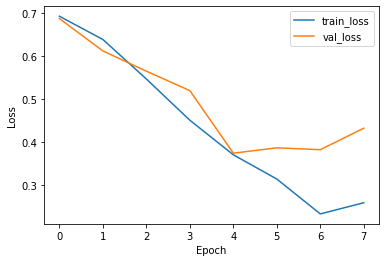

7/7 [==============================] - 0s 66ms/step - loss: 0.3746 - accuracy: 0.8800
Test Accuracy: 88.00%
7/7 [==============================] - 1s 62ms/step
Confusion Matrix:
[[81 15]
 [ 9 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        96
           1       0.86      0.91      0.89       104

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

AUC Score: 0.88

Precision: 0.8636363636363636
Recall: 0.9134615384615384
F1 Score: 0.8878504672897196
Cohen's Kappa Coefficient: 0.7590361445783133
Matthews Correlation Coefficient (MCC): 0.7604171655967964
Balanced Accuracy: 0.8786057692307692
Time taken: 61.96 seconds


In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define your custom CNN architecture
input_tensor = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to a CSV file
metrics_dict = {
    'Model': 'Model8_100_Epochs',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': np.mean(history.history['val_accuracy']),  # Convert array to single number
    'Validation Loss': np.mean(history.history['val_loss']),  # Convert array to single number
    'Precision': np.mean(precision),  # Convert array to single number
    'Recall': np.mean(recall),  # Convert array to single number
    'AUC-ROC': roc_auc,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame([metrics_dict])

# Save DataFrame to CSV
metrics_df.to_csv('model8_100_metrics.csv', index=False)




In [13]:
# import pandas as pd
# from IPython.display import display


# # Load metrics from CSV files for each epoch
# metrics_20_epochs = pd.read_csv("model8_20_metrics.csv")
# metrics_40_epochs = pd.read_csv("model8_40_metrics.csv")
# metrics_60_epochs = pd.read_csv("model8_60_metrics.csv")
# metrics_80_epochs = pd.read_csv("model8_80_metrics.csv")
# metrics_100_epochs = pd.read_csv("model8_100_metrics.csv")

# # Concatenate all metrics into a single DataFrame
# all_metrics = pd.concat([metrics_20_epochs, metrics_40_epochs, metrics_60_epochs, metrics_80_epochs, metrics_100_epochs], ignore_index=True)

# # Save combined metrics to a single CSV file
# all_metrics_file = "model8(CNN)_metrics_combined.csv"
# all_metrics.to_csv(all_metrics_file, index=False)

